**Check if R is available and its version**

In [1]:
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

**########################################################################################################################**<p>
**Setting up our R environment and `load the tables` generated using `METAPIPE pipeline` in `metapipe-run.ipynb` Notebook:**<p>
**########################################################################################################################**

**Load required packages for this data analysis session:**

In [2]:
library("RColorBrewer")
library("phyloseq")
library("ggplot2")
library("vegan")
library("dplyr")
library("ape")
library("png")
library("repr")
library("data.table")

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




**Load the OTU table (OTU by sample abundance)**

In [3]:
otu_table <- read.table("trnL_sub_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", header=TRUE, row.names=1)

**Convert table to matrix**

In [4]:
otu_table <- as.matrix(otu_table)

**Load the taxa assignments table (OTU - lineage - taxa by best hit)**

In [5]:
taxonomy <- read.table("target95_trnL_OTU_tax_assignments.txt", header=TRUE, row.names = 1)

**Convert table to matrix**

In [6]:
taxonomy <- as.matrix(taxonomy)

<p>Load the <strong>metadata</strong>, a tab delimited text file with the SampleID (mandatory) in the first column and following columns describing important features from your data. The format must be like this:</p>
<p><strong>SampleID</strong><span style="white-space:pre;"><strong>&nbsp; &nbsp; </strong></span><strong>SampleName</strong><span style="white-space:pre;"><strong>&nbsp; &nbsp; </strong></span><strong>Replicate </strong><strong>Season</strong><span style="white-space:pre;"><strong>&nbsp; &nbsp; </strong></span></p>
<p>Amazon_W_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Winter &nbsp;</p>
<p>Amazon_W_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_W<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Winter<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span></p>
<p>Amazon_S_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S_I<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Summer<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span></p>
<p>Amazon_S_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S_II<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Amazon_S<span style="white-space:pre;">&nbsp; &nbsp;&nbsp;</span>Summer</p>

In [7]:
metadata <- read.table("trnL_sub_metadata.txt", header=TRUE, row.names = 1)

In [8]:
meta <- as.matrix(metadata)

**Tables conversion to variables according to Phyloseq functions:**

In [9]:
OTU <- otu_table(otu_table, taxa_are_rows = TRUE)

In [10]:
TAX <- tax_table(taxonomy)

In [11]:
META <- sample_data(metadata)

**Combine the new three data variables into a Phyloseq object, allowing the concomitant quantitative and taxonomical data exploration, along with to any descriptive variable present in metadata file.**

In [12]:
merged <- phyloseq(OTU, TAX, META)

**Create a random phylogenetic tree**

In [13]:
random_tree = rtree(ntaxa(merged), rooted=TRUE, tip.label=taxa_names(merged))

**Create the final phyloseq object merging all 4 main components, OTU, TAX, META and random_tree**

In [14]:
data <- phyloseq(OTU, TAX, META, random_tree)

**Check your phyloseq object:**

In [15]:
data

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 150 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 150 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 150 tips and 149 internal nodes ]

In [16]:
head(sample_names(data))

[1] "Angelicaesinensis_a"   "Angelicaesinensis_b"   "Carthamustinctorius_a"
[4] "Carthamustinctorius_b" "Citrusaurantium_a"     "Citrusaurantium_b"

In [17]:
ntaxa(data)

[1] 150

In [18]:
nsamples(data)

[1] 34

**Total abundance of our OTU table:**

In [19]:
sum(sample_sums(data))

[1] 472695

In [20]:
rank_names(data)

[1] "Kingdom"       "Phylum"        "Class"         "Ord"          
[5] "Family"        "Genus"         "Species"       "SIM"          
[9] "OTU_abundance"

In [21]:
taxa_names(data)[1:10]

[1] "967e951648145482fcc47f85b2a3530bec26d552"
 [2] "97602821a6e897f274a6fe959813742590e6417a"
 [3] "b274be594c362fcd87df1930e8b4405f0454df38"
 [4] "1f521ef82b7fcb93a3736f51b9d6daa90ba1df4c"
 [5] "c6afc9e68a38938621c1064c45b40824c3f2cf28"
 [6] "6bdbedb7b073e78027c851423a63b961a739d276"
 [7] "32e83900937d7e040ee2bd19acf333e8c106d938"
 [8] "713910463d2c8ae1865c42cc5f6d174248a94dce"
 [9] "f758fbb1ef730f942b83ae64d959f960dfc2d616"
[10] "ca440831325bcb569e15af2e937ce9e3ec5db6fc"

**It is importante to remeber that for `Phyloseq` package, our loaded dataset is called `object` and the OTUs are referred as `taxa`.**<p>
**The taxonomic assignment itself you get when manipulating the `taxonomy` table:**

In [22]:
taxonomy[1:3,]

,Kingdom,Phylum,Class,Ord,Family,Genus,Species,SIM,OTU_abundance
ac90db76fbae68003ec939d36b9847a46cbfa3c7,Eukaryota,Streptophyta,Magnoliopsida,Sapindales,Rutaceae,Citrus,micrantha,100.000,51129
2987db85c9fae5a1464f814e070b7507621e8a57,Eukaryota,Streptophyta,Magnoliopsida,Poales,Poaceae,Zea,mays,100.000,43673
addff39eca064dd9caa294721e6a23cab9c331ab,Eukaryota,Streptophyta,Magnoliopsida,Apiales,Apiaceae,Selinum,carvifolia,100.000,41429


**or using the function `tax_table`:**

In [26]:
tax_table(data)[1:3,]

,Kingdom,Phylum,Class,Ord,Family,Genus,Species,SIM,OTU_abundance
967e951648145482fcc47f85b2a3530bec26d552,Eukaryota,Streptophyta,Magnoliopsida,Apiales,Apiaceae,Selinum,carvifolia,100.000,33003
97602821a6e897f274a6fe959813742590e6417a,Eukaryota,Streptophyta,Magnoliopsida,Malvales,Malvaceae,Talipariti,glabrum,95.588,5
b274be594c362fcd87df1930e8b4405f0454df38,Eukaryota,Streptophyta,Magnoliopsida,Asparagales,Orchidaceae,Luisia,hancockii,100.000,334


**Let's check our variables, which were defined in the `metadata` table.**<p>
**Remember this: the metadata table is `YOURS`, which means that all the columns you have defined have some `possible relationship` to the data, and you are `free to add` as many columns as you like, depending on your `creativity` or `prior knowledge` of the data being analyzed.**

In [23]:
sample_variables(data)

[1] "SampleName" "Replicate"  "Experiment" "Exp_fam"    "Exp_genus"

**Let's confirm that we don't have any empty sample:**

In [27]:
data <- prune_taxa(taxa_sums(data) > 0, data)

In [28]:
data

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 150 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 150 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 150 tips and 149 internal nodes ]

**#############################################################################**<p>
**Data exploration and preprocessing:**<p>
**#############################################################################**

**Now, let's create a function check the sequencing depth of each sample:**

In [29]:
check_seq_depth <- function(in_data) {
    sums_all <- data.frame(colSums(otu_table(in_data)))
    colnames(sums_all) <- "Sample_TotalSeqs"
    sums_all$sample <- row.names(sums_all)
    sums_all <- arrange(sums_all, Sample_TotalSeqs)
    return(sums_all)
}

**Let's check the sequence depth by sample (total number of reads by sample in our object, i.e. our *dataset*):**

In [31]:
total_abundance <- check_seq_depth(data)

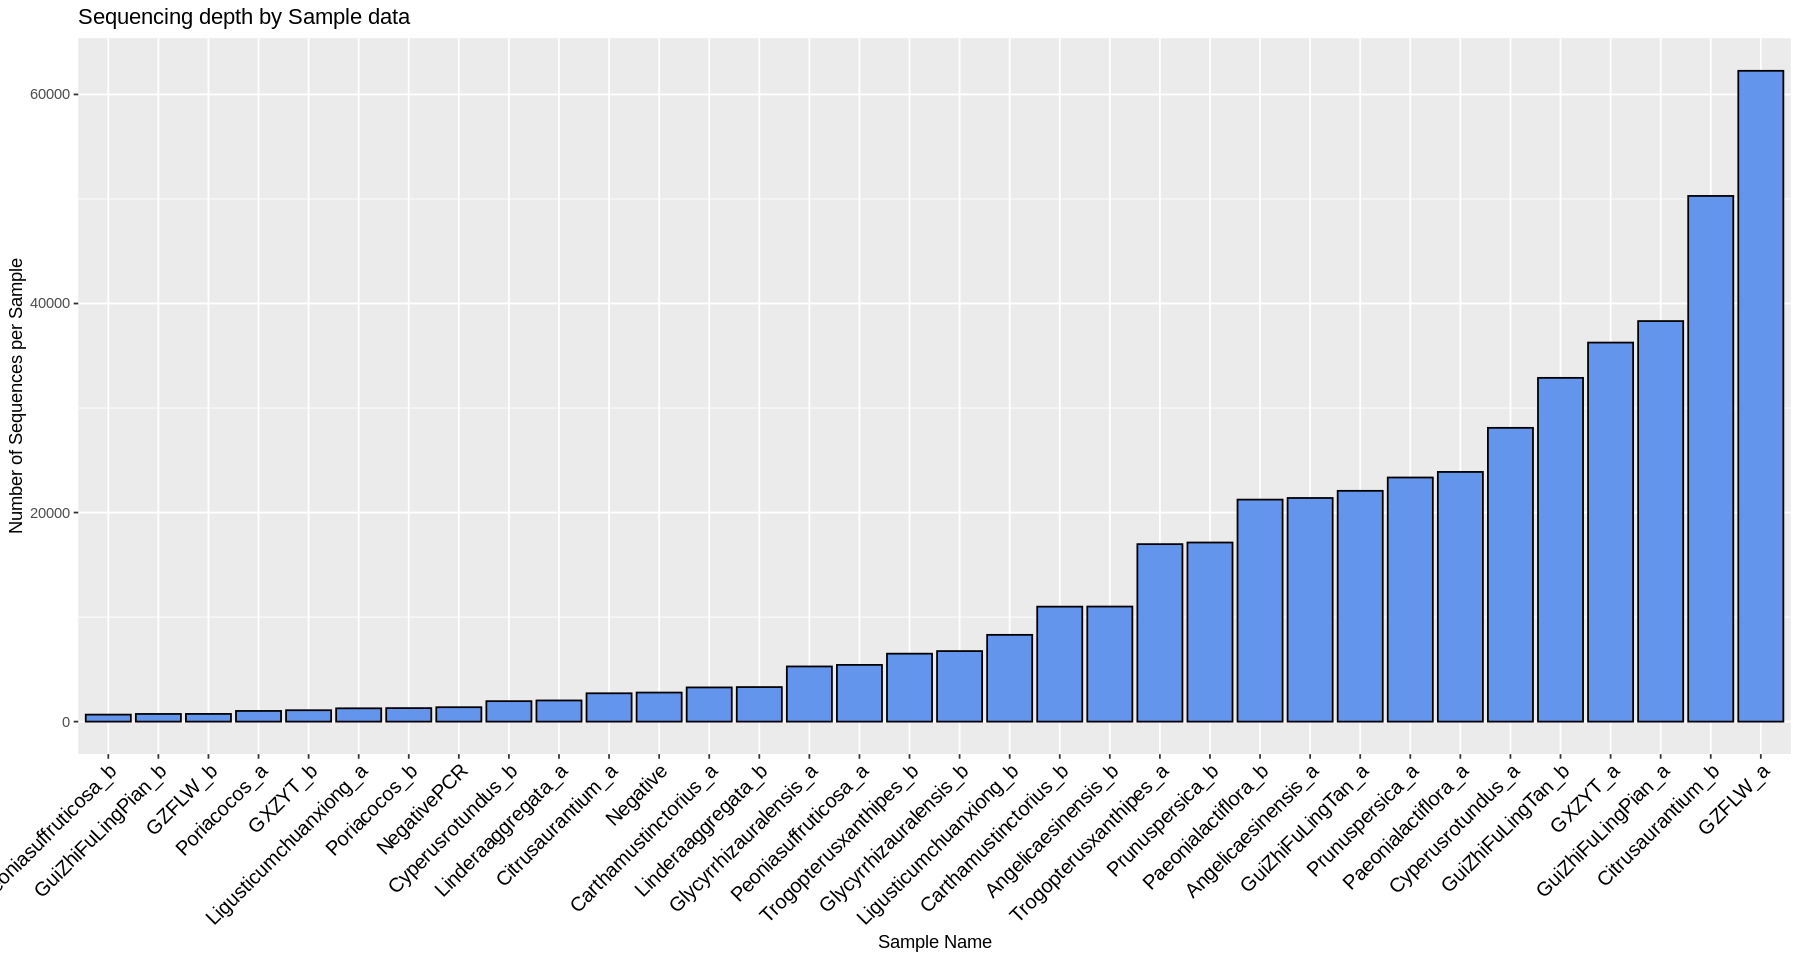

In [32]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(total_abundance, aes(x=reorder(sample, Sample_TotalSeqs), y = Sample_TotalSeqs)) + 
  ylab("Number of Sequences per Sample") +
  geom_bar(stat = "identity", colour="black",fill="cornflowerblue")  + xlab("Sample Name") + 
  ggtitle("Sequencing depth by Sample data") + 
  theme(axis.text.x = element_text(colour = "black", size=12, angle=45, hjust = 1, vjust = 1))

**Now we have our first observation: the `GZFLW_a` sample is the most abundant**.

**Now I will show you the impact of increasing the minimum abundance threshold:**

**Take a look on how many taxa remain when asking for OTUs with at least 10 reads:**

In [33]:
data_10_cut <- prune_taxa(taxa_sums(data) > 10, data)

In [34]:
data_10_cut

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 103 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 103 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 103 tips and 102 internal nodes ]

**When asking for at least 10 reads by OTU, 47 taxa are lost.**<p>
**How would it be selecting only OTUs with more than 100 reads?**

In [35]:
data_100_cut <- prune_taxa(taxa_sums(data) > 100, data)

In [36]:
data_100_cut

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 69 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 69 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 69 tips and 68 internal nodes ]

**From 150 taxa, we end up with only 69, highlighting the `importance` of the `low abundance samples` to the dataset richnes!!**

**Let's plot the `rarefaction curve`, which is used to determine whether a specific sample has been sufficiently sequenced to represent its identity.**<p>
**The rarefaction curve is a plot of the number of species against the number of samples, randomly re-sampling the samples several times and then plotting the average number of species found on each sample.**

The **rarecurve** function is part of the **`Vegan`** package (*Community Ecology Package: Ordination, Diversity and Dissimilarities*).

You can take a look on `Vegan's` functionalities here: https://peat-clark.github.io/BIO381/veganTutorial.html

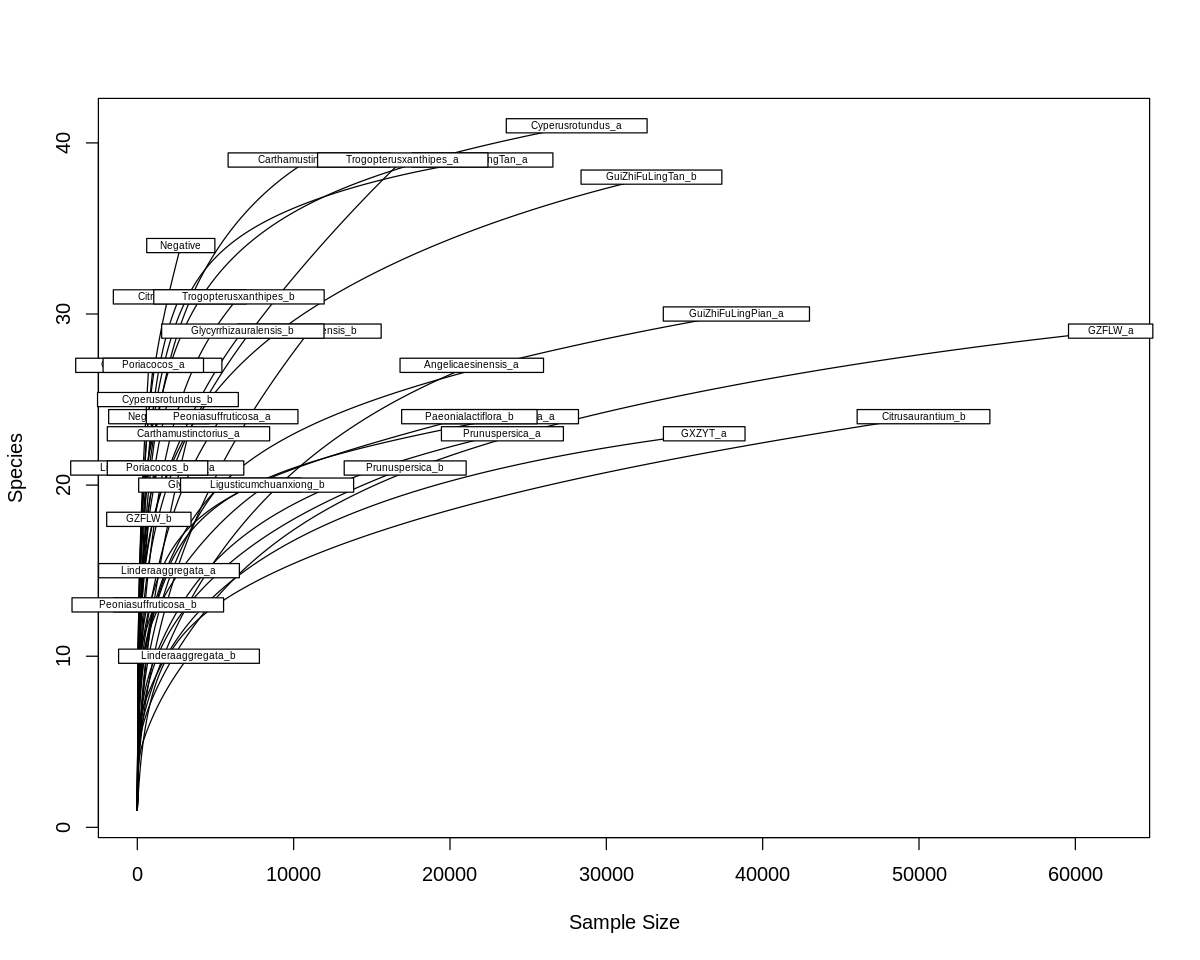

In [37]:
#RARECURVE
options(repr.plot.width=10, repr.plot.height=8)
rarecurve(t(otu_table(data)), step=50, cex=0.5)

**We observe that around 12 samples present curves at least starting to stabilize in OTU richness (y axis) according to the sampling size increasing (x axis).** 

**Let's check the raw OTU richness by Family (whole dataset):**

**we will `sum` up the abundance of OTUs (`OTU_abundance` column), `grouped by Families`:**

In [39]:
taxonomy[1:3,1:9]

,Kingdom,Phylum,Class,Ord,Family,Genus,Species,SIM,OTU_abundance
ac90db76fbae68003ec939d36b9847a46cbfa3c7,Eukaryota,Streptophyta,Magnoliopsida,Sapindales,Rutaceae,Citrus,micrantha,100.000,51129
2987db85c9fae5a1464f814e070b7507621e8a57,Eukaryota,Streptophyta,Magnoliopsida,Poales,Poaceae,Zea,mays,100.000,43673
addff39eca064dd9caa294721e6a23cab9c331ab,Eukaryota,Streptophyta,Magnoliopsida,Apiales,Apiaceae,Selinum,carvifolia,100.000,41429


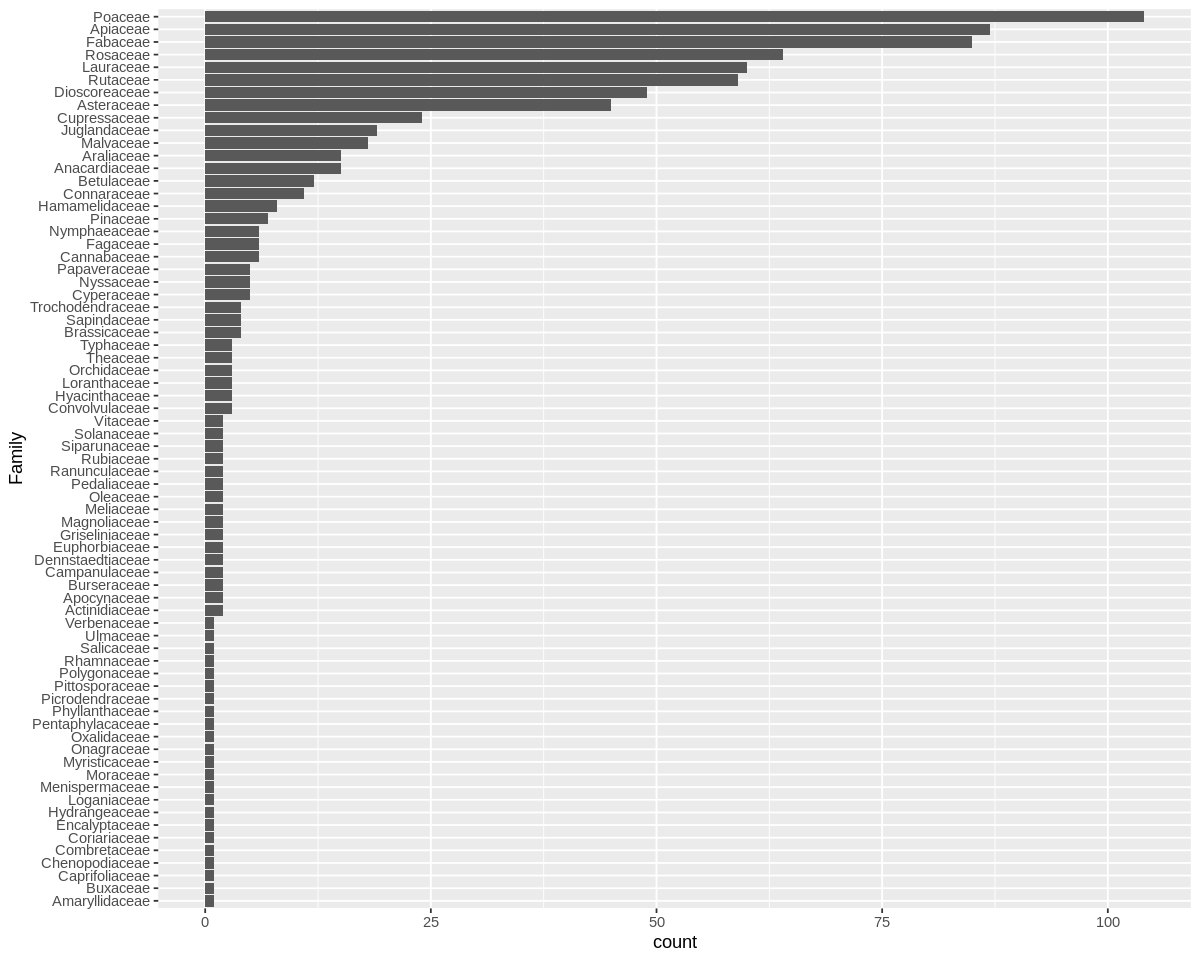

In [40]:
options(repr.plot.width=10, repr.plot.height=8)
as.data.frame(taxonomy) %>%
  group_by(Family) %>%
  dplyr::count(name = 'count') %>%
  arrange(desc(count)) %>% 
  na.omit() %>%
  ggplot(aes(x=reorder(Family, count), y=count)) +
  xlab("Family") +
  geom_bar(stat = 'identity') + 
  coord_flip()

**The Families `Poaceae`, `Apiaceae`, and `Fabaceae` are the three Families with higher richness of distinct OTUs assigned to them.**

**Now, let's check the same information, but selecting only Families with more than 5 OTUs:**

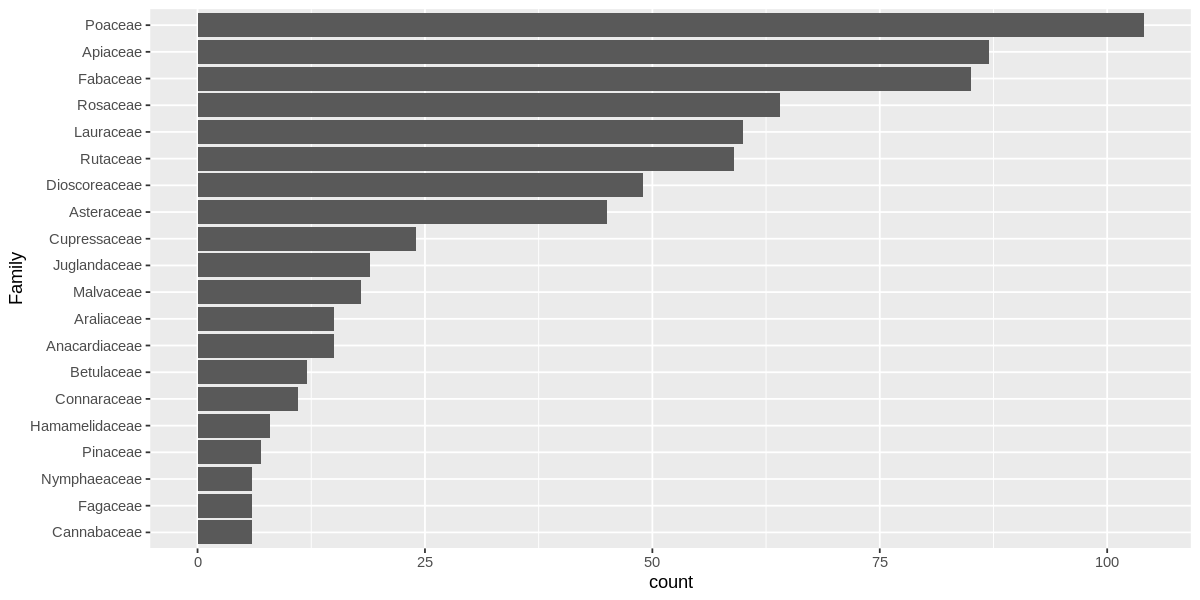

In [41]:
options(repr.plot.width=10, repr.plot.height=5)
as.data.frame(taxonomy) %>%
  group_by(Family) %>%
  dplyr::count(name = 'count') %>%
  filter(count > 5) %>%
  arrange(desc(count)) %>% 
  na.omit() %>%
  ggplot(aes(x=reorder(Family, count), y=count)) +
  xlab("Family") +
  geom_bar(stat = 'identity') + 
  coord_flip()

**Here we can see again that, along with the `low abundance of reads` samples observed before, the `low OTU richness` taxa assigned also have a `strong impact` on the overall `alpha-diversity`. From 71 Families, only 20 show OTU richness above 5.**

**Now let's check the overall OTU abundance by Family (first glimpse on taxonomic composition):**

First we need to convert the taxonomy matrix in a dataframe:

In [42]:
taxonomy_data <- as.data.frame(taxonomy)

next we need to convert the OTU_abundance column to integer, in order to be summed (it is loaded as a character column).

In [44]:
taxonomy_data$OTU_abundance <- as.integer(taxonomy_data$OTU_abundance)

In the following command, we are doing the **abundance somatory by Family**, filtering Families with **abundance above 100** (to facilitate the viewing) and then plotting the **overall abundance by Family**.

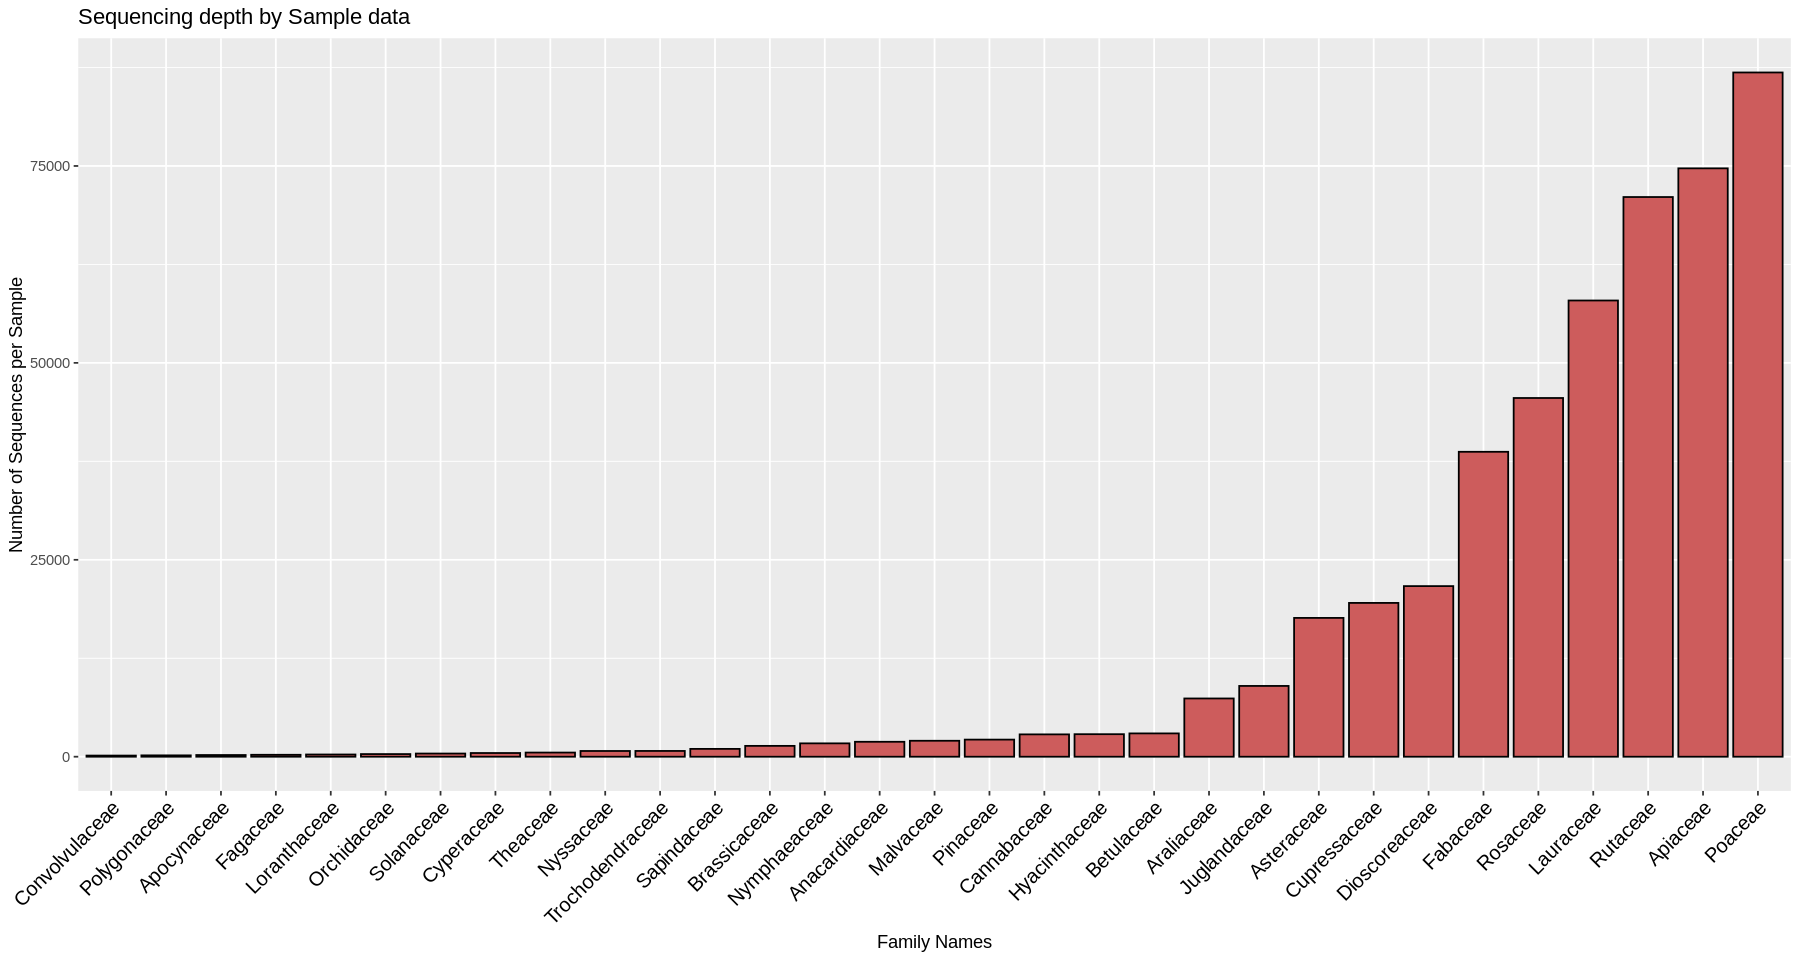

In [59]:
options(repr.plot.width=15, repr.plot.height=8)
aggregate(OTU_abundance ~ Family, taxonomy_data, sum) %>%
 filter(OTU_abundance > 100) %>%
ggplot(aes(x=reorder(Family, OTU_abundance), y=OTU_abundance)) + 
  ylab("Number of Sequences per Sample") +
  geom_bar(stat = "identity", colour="black",fill="indianred")  + xlab("Family Names") + 
  ggtitle("Sequencing depth by Sample data") + 
  theme(axis.text.x = element_text(colour = "black", size=12, angle=45, hjust = 1, vjust = 1))

**Observe that both `Poaceae` and `Apiaceae` are the Families with higher OTU richness, observed before, and also present the higher overall abundance of reads throughout the dataset.**<p>
**However, `Fabaceae` (the third in OTU richness) is not among the three top abundance Families, ilustrating that `Richness` and `Abundance` are not directly related to each other.**

**###############################################################**<p>
**Now we are going to start our `taxonomic composition` analysis:**<p>
**###############################################################**

**Now let's take a look in the general taxonomic composition of our dataset:**

First we **agglomerate** our data into *Family* taxonomic rank, then<p>
Transform the samples counts to **relative abundance**, then<p>
Then we filter by **at least 5% abundance**, in order to better see the Families distribution:<p>

In [66]:
#BARPLOT RELATIVO
data_rel <- data %>%
  tax_glom(taxrank = "Family") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.05) %>%                         
  arrange(Abundance)

**The following function automatically creates a custom colour palette using the *RColorBrewer* R package:**

In [67]:
custom_palette <- function(n_items, palette) {
    colourCount = n_items
    getPalette  = colorRampPalette(palette)
    return(getPalette(colourCount))
}

**Now let's plot our Family composition by sample:**

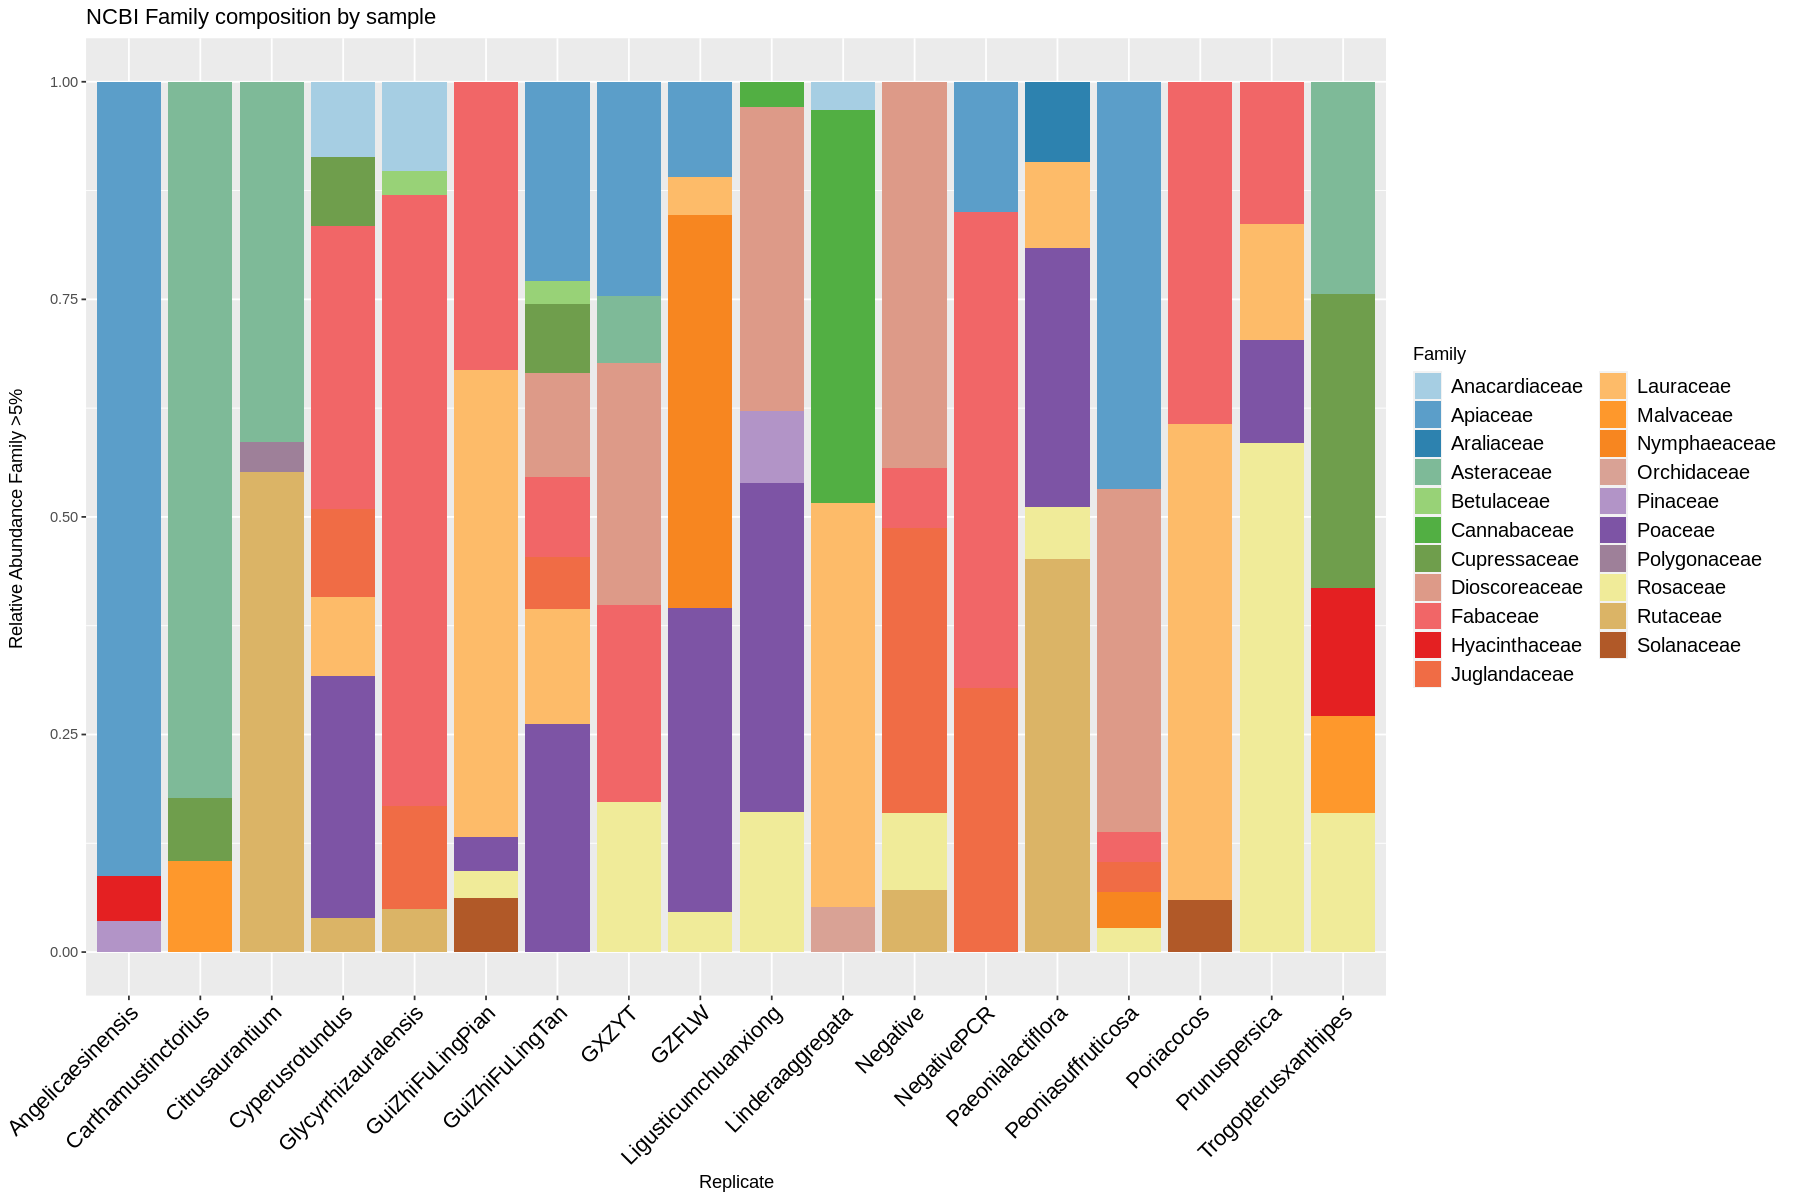

In [68]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(data_rel, aes(x = Replicate, y = Abundance, fill = Family)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_palette(21, brewer.pal(12, "Paired"))) +
  theme(axis.text.x = element_text(colour = "black", size=13, angle=45, hjust = 1, vjust = 1)) +
  theme(legend.text = element_text(size=12)) +
  ylab("Relative Abundance Family >5% \n") +
  ggtitle("NCBI Family composition by sample")

**ATTENTION!!**
**Observe the `Negative control` samples!!!**<p>
We see that in the `Negative` (blank) sample reads were amplified and assigned as *Rutaceae*, *Rosaceae*, *Juglandaceae*, and *Dioscoreaceae*, while in the `PCR Negative` we have reads amplified and assigned to *Juglandaceae*, *Fabaceae*, and *Apiaceae*.<p>
There is no consensus about how to deal with **`Negative controls`** in metabarcoding projects,<p>
I recommend the following reading: https://www.frontiersin.org/articles/10.3389/fevo.2020.609973/full<p>
**I will show you one way to deal with it, which is removing the OTUs amplified in the `Negative controls` samples (which were not supposed to be amplified, so we are not sure about the origin, or if a `contamination` has spread throughout our PCR plate.**

**First, let's check the taxonomic composition of these negative samples in more detail:**<p>
We first create a **subset** with only samples identified as *Negatives* will be selected:

In [69]:
#NEGATIVES CONTROLS
data_neg <- subset_samples(data, Replicate == "Negative")
data_neg <- prune_taxa(taxa_sums(data_neg) > 0, data_neg)

In [70]:
data_neg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 34 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 34 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 34 tips and 33 internal nodes ]

In the first `Negative` sample we have **34 taxa (OTUs)** identified.<p>
Let's check the `PCR negative`sample:

In [71]:
data_negPCR <- subset_samples(data, Replicate == "NegativePCR")
data_negPCR <- prune_taxa(taxa_sums(data_negPCR) > 0, data_negPCR)

In [72]:
data_negPCR

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 24 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 24 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 24 tips and 23 internal nodes ]

We have **24 taxa (OTUs)** identified in the `PCR negative`sample.<p>
**Let's check the composition of the `Negative control same`:**

In [73]:
data_neg_fam <- data_neg %>%
  tax_glom(taxrank = "Family") %>%                     
  psmelt() %>%                                         
  arrange(Family)

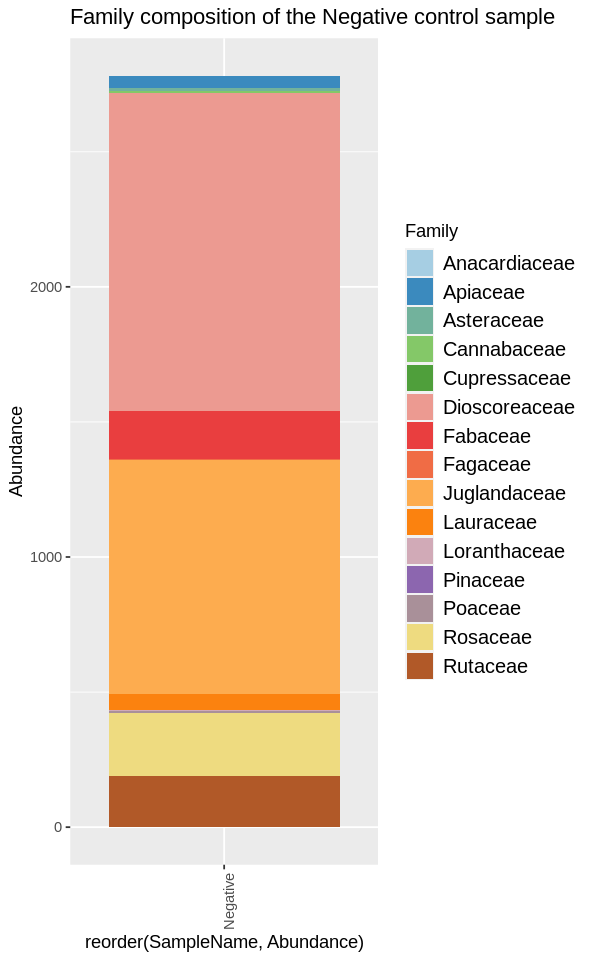

In [78]:
options(repr.plot.width=5, repr.plot.height=8)
ggplot(data_neg_fam, aes(x = reorder(SampleName, Abundance), y = Abundance, fill = Family)) + 
  geom_bar(stat = "identity") +
  scale_fill_manual(values = custom_palette(15, brewer.pal(12, "Paired"))) +
  theme(legend.text = element_text(size=12)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("Family composition of the Negative control sample")

**Let's check the abundance distribution of the 34 OTUs from the data_neg subset (Negative control sample):**

**The following function selects the topN most abundant OTUs from a dataset:**

In [79]:
get_top_OTUs <- function(n_otus, in_data) {
    topN <- n_otus
    most_abundant_taxa = sort(taxa_sums(in_data), TRUE)[1:topN]
    top <- prune_taxa(names(most_abundant_taxa), in_data)
    top_OTUs <- data.frame(taxa_sums(top))
    colnames(top_OTUs) <- "Sample_TotalSeqs"
    top_OTUs$sample <- row.names(top_OTUs)
    top_OTUs <- arrange(top_OTUs, Sample_TotalSeqs)
}

In this case we are going to select all the 34.

In [80]:
top_OTUs_neg <- get_top_OTUs(34, data_neg)

**Let's plot the `Negative` control sample OTU distribution:**

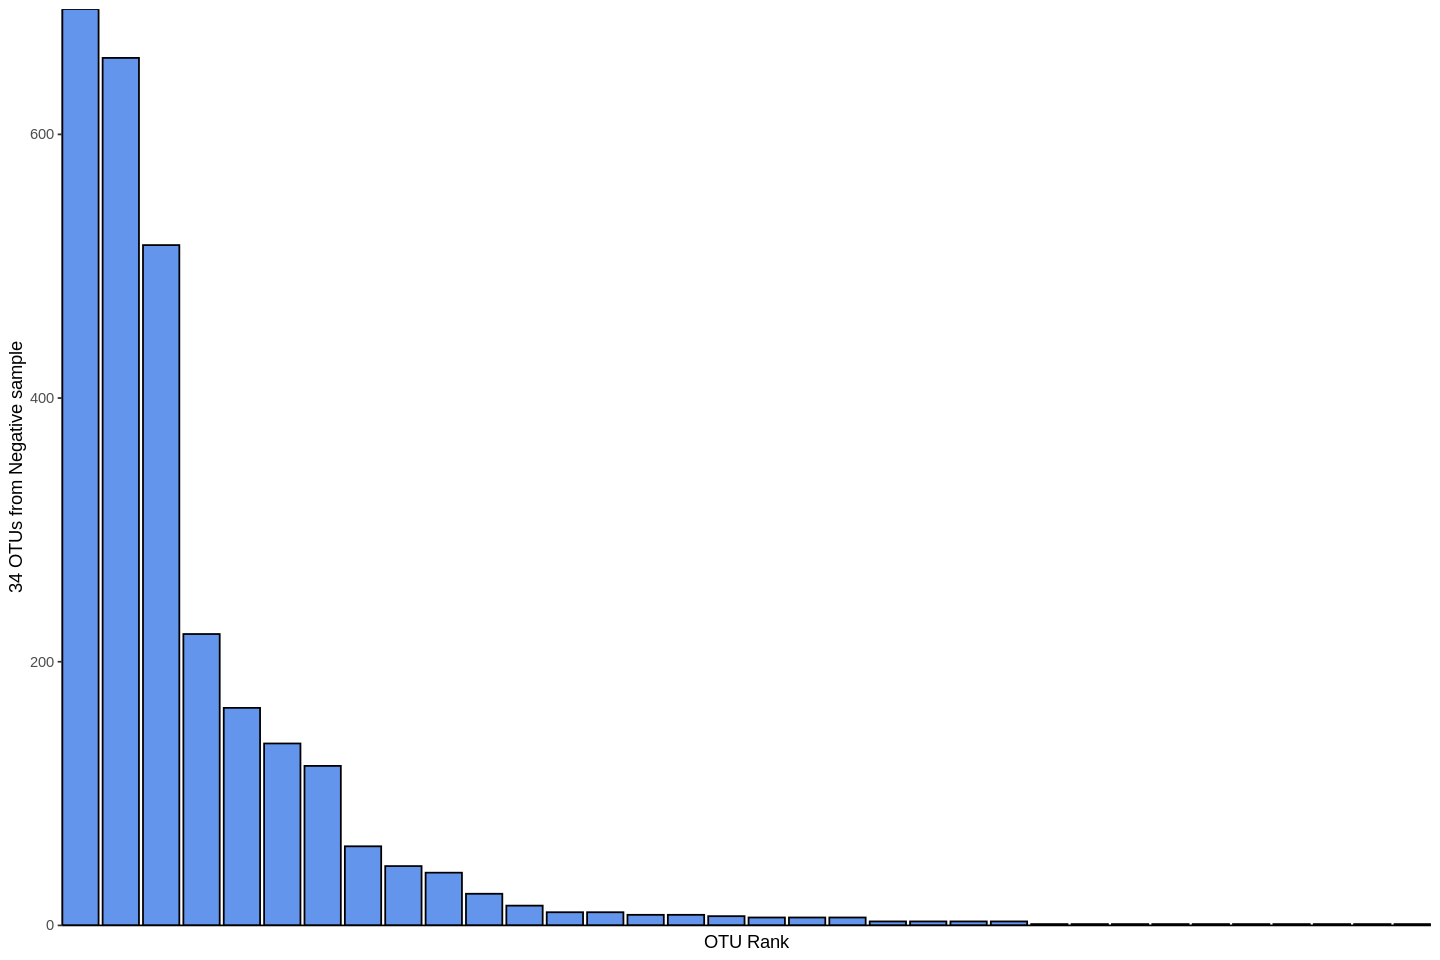

In [84]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(top_OTUs_neg,aes(x=reorder(sample, -Sample_TotalSeqs), y = Sample_TotalSeqs)) + 
  geom_bar(stat="identity",colour="black",fill="cornflowerblue")  +
  xlab("OTU Rank") + ylab("34 OTUs from Negative sample") +
  scale_x_discrete(expand = c(0,0)) + 
  scale_y_continuous(expand = c(0,0)) + theme_classic() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

**We see that we have `three` highly abundant OTUs, let's check the OTU names in order to further investigate them:**

Let's select only the last three OTUs from `top_OTUs_neg` table, which are the most abundant:

In [87]:
top_OTUs_neg[32:34,]

,Sample_TotalSeqs,sample
,<dbl>,<chr>
c65370ec20a9cdf9089e1983d7c5c3d4227a870b,516,c65370ec20a9cdf9089e1983d7c5c3d4227a870b
94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca,658,94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca
265f74f49f9531de8808b253efa96dc7c320df27,695,265f74f49f9531de8808b253efa96dc7c320df27


**Now, let's explore `WHO` are these three highly abundant OTUs amplified in the `Negative control sample`:**<p>
**265f74f49f9531de8808b253efa96dc7c320df27**<p>
**94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca**<p>
**c65370ec20a9cdf9089e1983d7c5c3d4227a870**<p>
**##########################################################################################################**<p>
**THE DETAILED INVESTIGATION OF THE TOP OTUS IS FOUND IN THE SECOND NOTEBOOK `metapipe-run.ipynb`**<p>
**PLEASE GO BACK TO THE END OF THE `metapipe-run.ipynb` Notebook!!!**
**##########################################################################################################**<p>

**Now that we have investigated who are the Top3 OTUs from the `Negative` control samplem let's do the same with the `Negative PCR` control sample:**

**Now let's check the composition of the `Negative PCR control`:**

In [88]:
data_negPCR_fam <- data_negPCR %>%
  tax_glom(taxrank = "Family") %>%                     
  psmelt() %>%                                         
  arrange(Family)

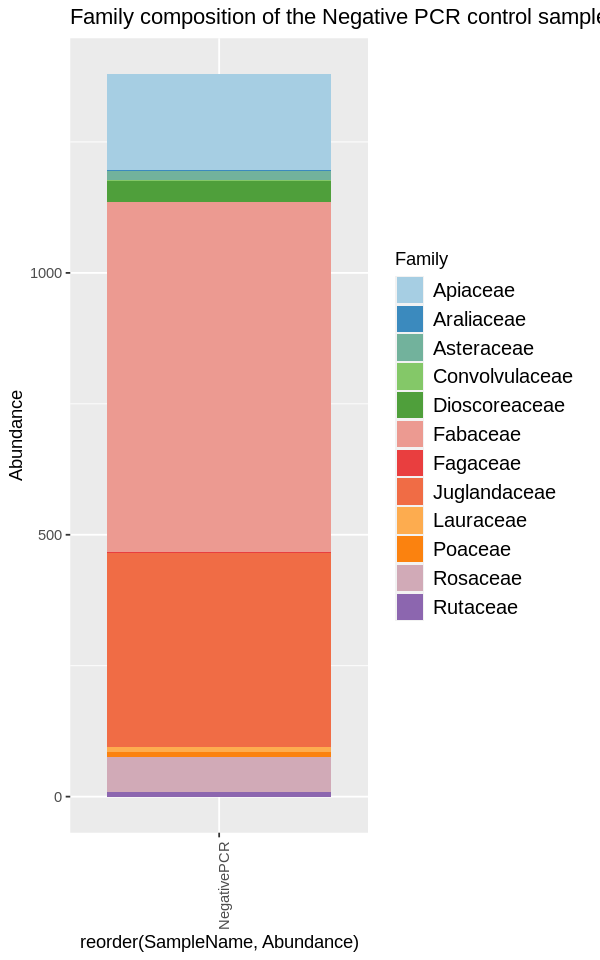

In [89]:
options(repr.plot.width=5, repr.plot.height=8)
ggplot(data_negPCR_fam, aes(x = reorder(SampleName, Abundance), y = Abundance, fill = Family)) + 
  geom_bar(stat = "identity") +
  scale_fill_manual(values = custom_palette(15, brewer.pal(12, "Paired"))) +
  theme(legend.text = element_text(size=12)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("Family composition of the Negative PCR control sample")

In [90]:
data_negPCR

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 24 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 24 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 24 tips and 23 internal nodes ]

**We already jnow that we have 24 OTUs in the `Negative PCR` control sample, so let's check the OTU abundance distribution:**

In [91]:
top_OTUs_negPCR <- get_top_OTUs(24, data_negPCR)

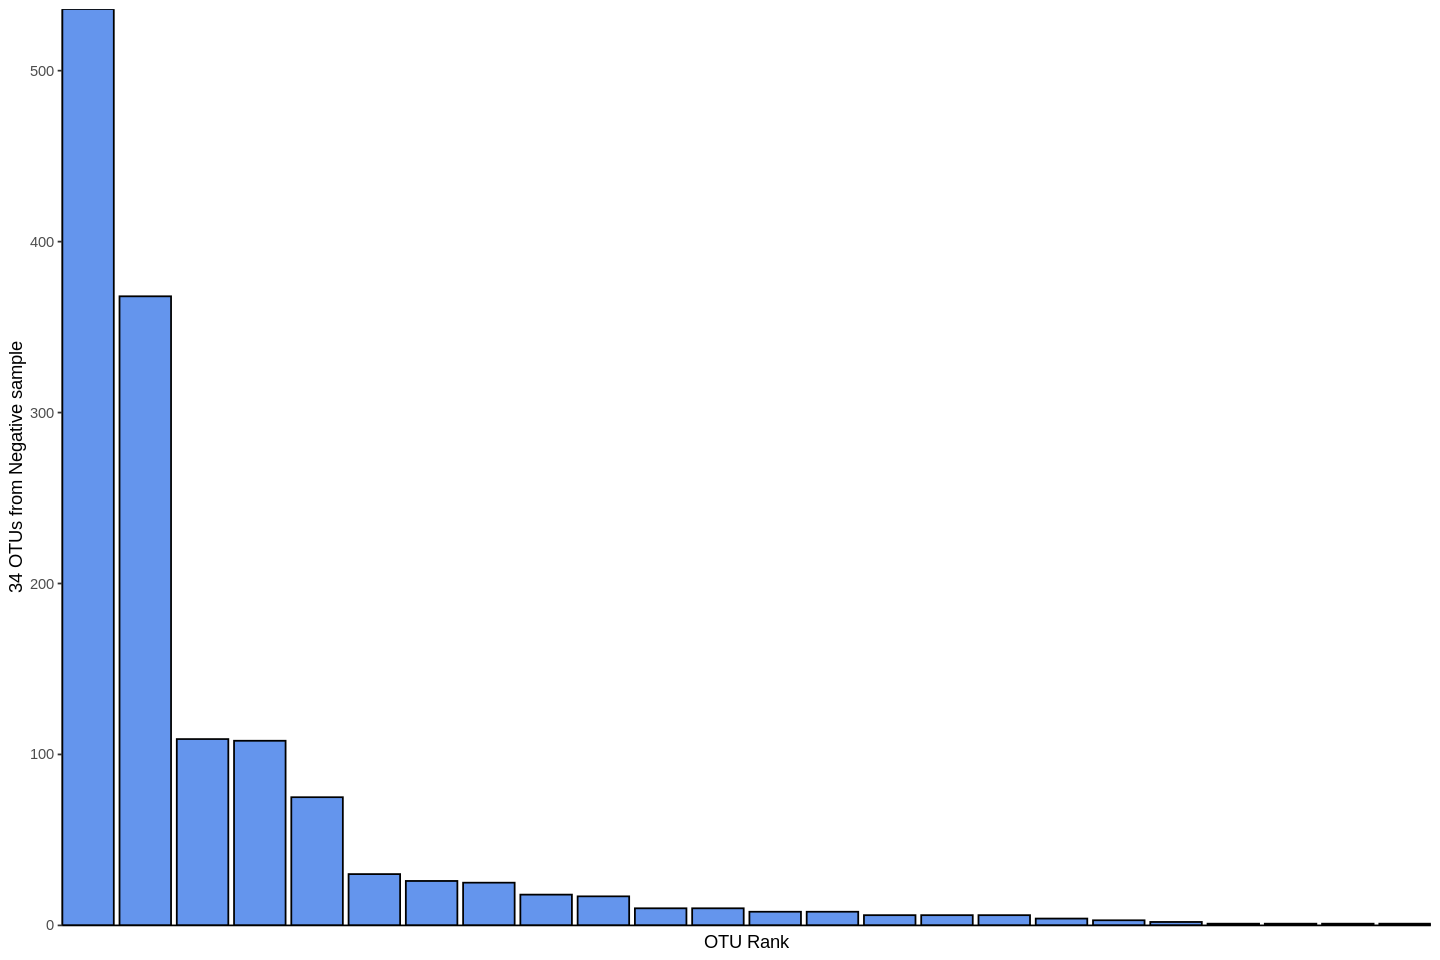

In [92]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(top_OTUs_negPCR,aes(x=reorder(sample, -Sample_TotalSeqs), y = Sample_TotalSeqs)) + 
  geom_bar(stat="identity",colour="black",fill="cornflowerblue")  +
  xlab("OTU Rank") + ylab("34 OTUs from Negative sample") +
  scale_x_discrete(expand = c(0,0)) + 
  scale_y_continuous(expand = c(0,0)) + theme_classic() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

**We see that we have `two` highly abundant OTUs, let's check the OTU names in order to further investigate them:**

Let's select only the last three OTUs from `top_OTUs_negPCR` table, which are the most abundant:

In [93]:
top_OTUs_negPCR[23:24,]

,Sample_TotalSeqs,sample
,<dbl>,<chr>
250a541b1d3823011d21097b0f3880d831e6b92d,368,250a541b1d3823011d21097b0f3880d831e6b92d
1ad23561fdff8989fd2e4e9a3735a4b8f5633fba,536,1ad23561fdff8989fd2e4e9a3735a4b8f5633fba


**Let's check who are these 2 OTUs with a much higer abundance in the `Negative PCR` sample:**

**Now, let's explore `WHO` are these two highly abundant OTUs amplified in the `Negative PCR control sample`:**<p>
**1ad23561fdff8989fd2e4e9a3735a4b8f5633fba**<p>
**250a541b1d3823011d21097b0f3880d831e6b92d**<p>
**##########################################################################################################**<p>
**THE DETAILED INVESTIGATION OF THE TOP OTUS IS FOUND IN THE SECOND NOTEBOOK `metapipe-run.ipynb`**<p>
**PLEASE GO BACK TO THE END OF THE `metapipe-run.ipynb` Notebook!!!**
**##########################################################################################################**<p>

**Finally, let's check the `Top OTUs from the whole dataset`, in order to see if some of the Negative OTUs are among them:**

**Let's check the Top 100 OTUs from the whole dataset:**

In [94]:
top_100OTUs <- get_top_OTUs(100, data)

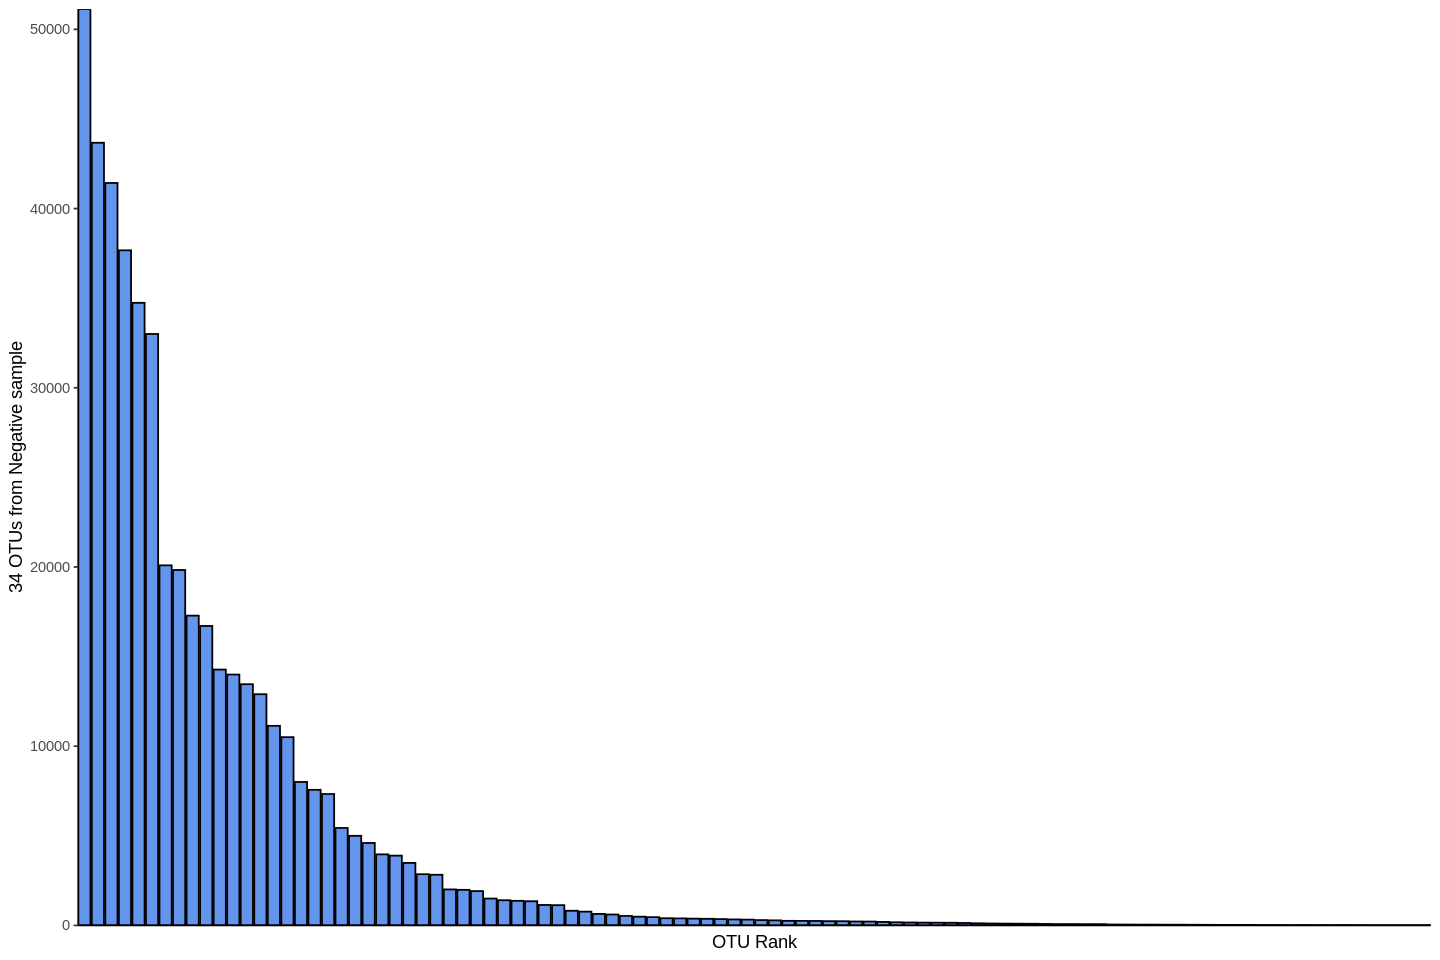

In [95]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(top_100OTUs,aes(x=reorder(sample, -Sample_TotalSeqs), y = Sample_TotalSeqs)) + 
  geom_bar(stat="identity",colour="black",fill="cornflowerblue")  +
  xlab("OTU Rank") + ylab("34 OTUs from Negative sample") +
  scale_x_discrete(expand = c(0,0)) + 
  scale_y_continuous(expand = c(0,0)) + theme_classic() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())

In [98]:
top_100OTUs[95:100,]

,Sample_TotalSeqs,sample
,<dbl>,<chr>
967e951648145482fcc47f85b2a3530bec26d552,33003,967e951648145482fcc47f85b2a3530bec26d552
28bf85082548d49c8d3b2793064a2fae0f417562,34741,28bf85082548d49c8d3b2793064a2fae0f417562
a069993ab97b3f720cf66567bfb1fad838b20dc6,37670,a069993ab97b3f720cf66567bfb1fad838b20dc6
addff39eca064dd9caa294721e6a23cab9c331ab,41429,addff39eca064dd9caa294721e6a23cab9c331ab
2987db85c9fae5a1464f814e070b7507621e8a57,43673,2987db85c9fae5a1464f814e070b7507621e8a57
ac90db76fbae68003ec939d36b9847a46cbfa3c7,51129,ac90db76fbae68003ec939d36b9847a46cbfa3c7


**We see that we have `SIX` highly abundant OTUs in the whole dataset `(data)`, let's check the OTU names in order to further investigate them:**
**ac90db76fbae68003ec939d36b9847a46cbfa3c7**<p>
**2987db85c9fae5a1464f814e070b7507621e8a57**<p>
**addff39eca064dd9caa294721e6a23cab9c331ab**<p>
**a069993ab97b3f720cf66567bfb1fad838b20dc6**<p>
**28bf85082548d49c8d3b2793064a2fae0f417562**<p>
**967e951648145482fcc47f85b2a3530bec26d552**

**Let's briefly check the proportion of reads encompassed by these 6 top abundance OTUs from the whole dataset:**

In [126]:
top_6_OTUs <- get_top_OTUs(6, data)

In [127]:
sum(top_6_OTUs$Sample_TotalSeqs)

[1] 241645

In [128]:
sum(sample_sums(data))

[1] 472695

In [129]:
(241645*100)/472695

[1] 51.1207

**Over 50% of total reads abundance from the whole dataset was clustered in the Top 6 OTUs.**<p>
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++<p>
**This highlights the importance of running this initial exploration of your data, since a `highly abundant taxa`, which may have a strong `impact` on your data analysis, could be one of these `top highly abundant OTUs`, which should be always investigated `carefully` to ensure that you are not dealing with a `contamination`, or a `skewed amplification`, among other reasons.**
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Now we are going to `remove the OTUs amplified in the negative controls`:**

Do not forget that this is a personal choice, There's no consensus about the right way of dealing with OTUs amplified in the Negative controls, but I will show you one of the possible solutions:

**We will use the `top_OTUs` tables we've just created to run the removing function, but we need to convert tehm to lists first:**

In [108]:
neg_OTU_list <- as.list(top_OTUs_neg[,2])

In [110]:
negPCR_OTU_list <- as.list(top_OTUs_negPCR[,2])

**The following function automatically filters the taxa that are not in our negative samples:**<p>
The **`list name`** is in the 3 and 4 lines, where you would edit with `neg_OTU_list` and `negPCR_OTU_list`files:

In [111]:
clean_data <- function(in_data) {
    allTaxa = taxa_names(in_data)
    allTaxa <- allTaxa[!(allTaxa %in% neg_OTU_list)]
    allTaxa <- allTaxa[!(allTaxa %in% negPCR_OTU_list)]
    data_clean <- prune_taxa(allTaxa, data)
    data_clean <- prune_samples(names(which(sample_sums(data_clean) > 1)), data_clean)
    return(data_clean)
}    

**The following command actually calls the `clean_data` function and runs it in the whole dataset `data`:**

In [112]:
data_clean <- clean_data(data)

**Let's check the BEFORE and AFTER removing Negative OTUs:**

In [113]:
data

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 150 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 150 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 150 tips and 149 internal nodes ]

In [114]:
data_clean 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 110 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 110 taxa by 9 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 110 tips and 109 internal nodes ]

**40 OTUs amplified in the negative controls were removed, and 110 taxa remained.**<p>
**Let's check if the composition changed:**

In [115]:
#BARPLOT RELATIVO
data_clean_rel <- data_clean %>%
  tax_glom(taxrank = "Family") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.05) %>%                         
  arrange(Replicate)

In [118]:
custom_palette <- function(n_items, palette) {
    colourCount = n_items
    getPalette  = colorRampPalette(palette)
    return(getPalette(colourCount))
}

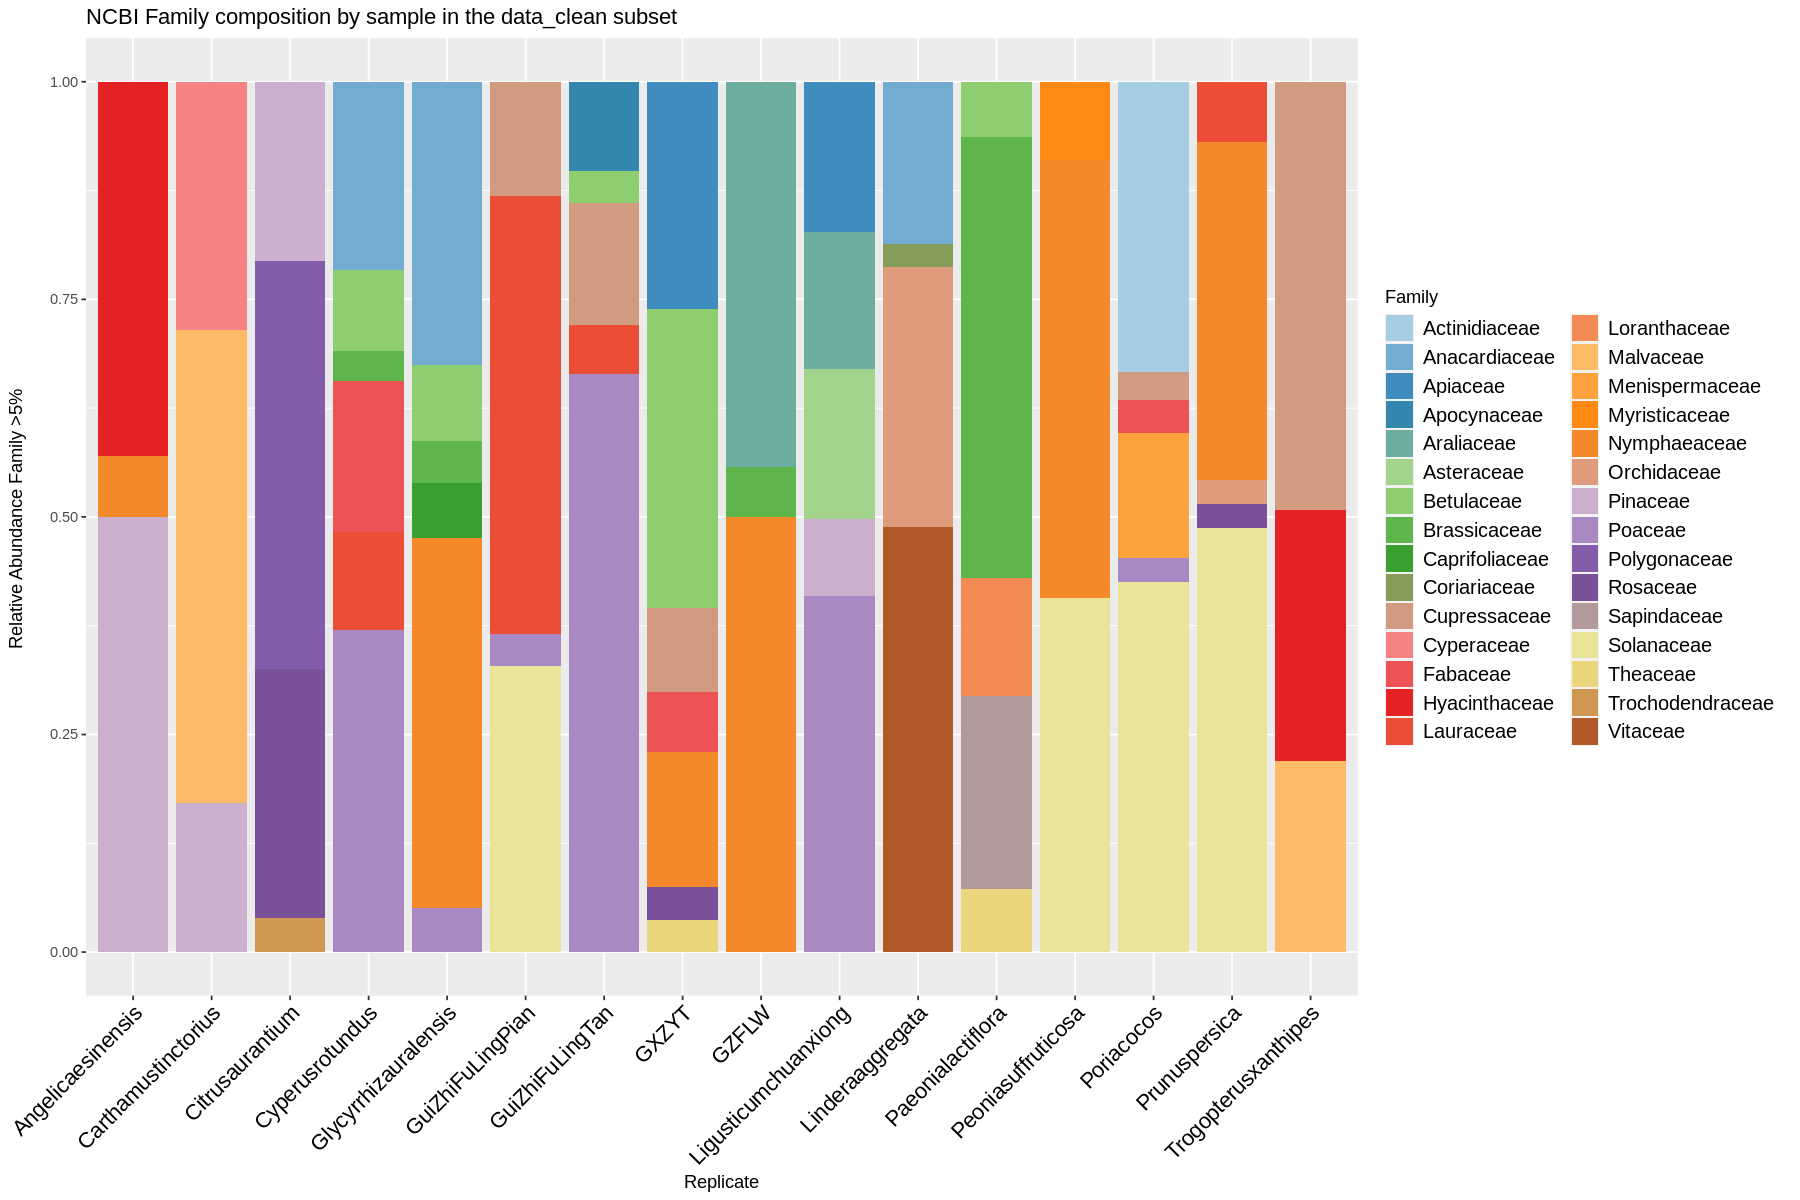

In [120]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(data_clean_rel, aes(x = Replicate, y = Abundance, fill = Family)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_palette(30, brewer.pal(12, "Paired"))) +
  theme(axis.text.x = element_text(colour = "black", size=13, angle=45, hjust = 1, vjust = 1)) +
  theme(legend.text = element_text(size=12)) +
  ylab("Relative Abundance Family >5% \n") +
  ggtitle("NCBI Family composition by sample in the data_clean subset")

**Observe that the negative control samples were automatically removed.**

**After removing the OTUs amplified in the `Negative` samples, we end up with 30 Families with abundance above 5%.**<p>
But remember, in our **first composition barplot**, we had only **21 Families** with abundance above 5%.

**Interestingly, removing the OTUs amplified in the negative controls increased the number of Families with reads abundance above 5%, from 21 to 30!**

**There's lots of Phyloseq tutorials, as well other packages, that you can explore from here.**<p>
**I'll show only one more plot, which shows the phylogenetic tree, with several arguments for displaying your data:**<p>
run help(plot_tree) in Rstudio, as well all other functions you'd like to know better.


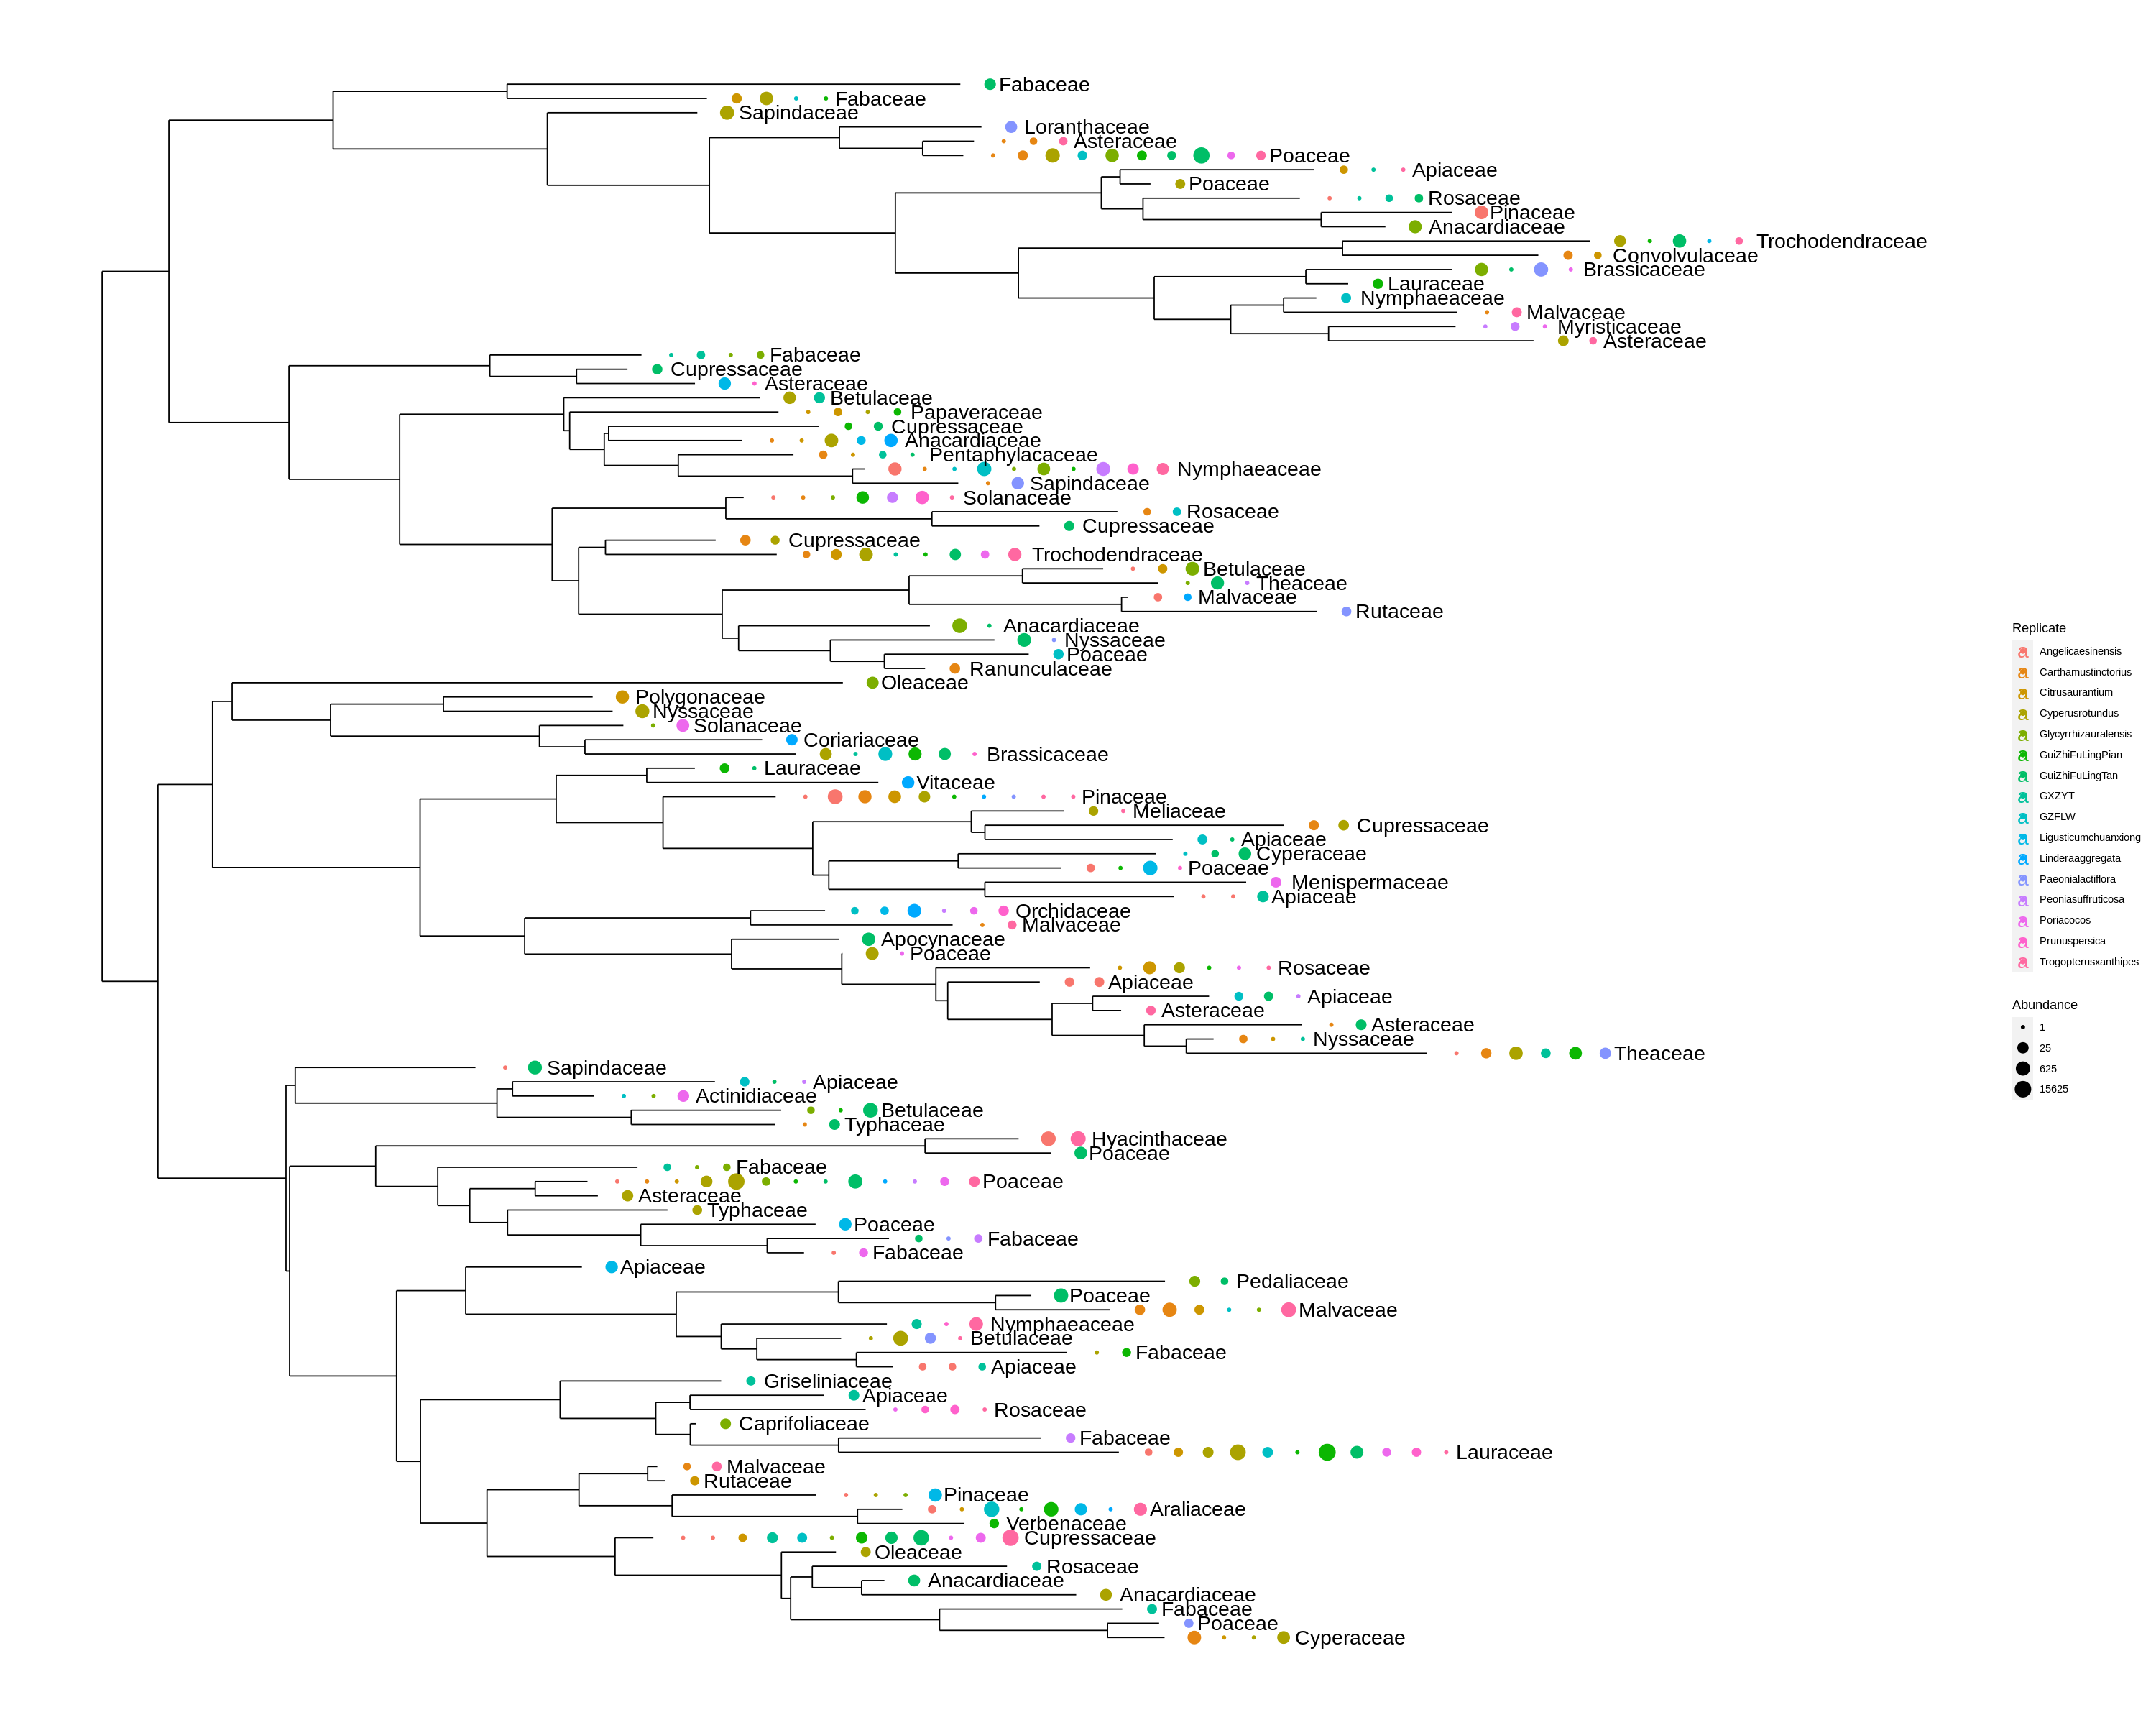

In [130]:
options(repr.plot.width=25, repr.plot.height=20)
plot_tree(data_clean, color="Replicate", size="Abundance", label.tips = "Family", text.size=6, ladderize = TRUE, plot.margin=0.1)

**##########################################################################################################**<p>
**THE FOLLOWING ANALYSIS WILL BE RUN WITH A COI DATASET, PART OF A DIET INVESTIGATION, FOCUSED ON ARTHROPODA PHYLUM.**<P>
**The respective tables were cloned from the GitHub repository into your Notebook along with all the Workshop data.**<p>
**##########################################################################################################**

In [131]:
otu_table2 <- read.table("COI_Diet_otu_table.txt", header=TRUE, row.names=1)

In [132]:
otu_table2 <- as.matrix(otu_table2)

In [133]:
taxonomy2 <- read.table("COI_NCBI_tax_assignment.txt", header=TRUE, row.names = 1)

In [134]:
taxonomy2 <- as.matrix(taxonomy2)

In [135]:
metadata2 <- read.table("metadata_COI_Diet.txt", header=TRUE, row.names = 1)

In [136]:
meta2 <- as.matrix(metadata2)

In [137]:
OTU2 <- otu_table(otu_table2, taxa_are_rows = TRUE)

In [138]:
TAX2 <- tax_table(taxonomy2)

In [139]:
META2 <- sample_data(metadata2)

In [140]:
merged2 <- phyloseq(OTU2, TAX2, META2)

In [141]:
random_tree2 = rtree(ntaxa(merged2), rooted=TRUE, tip.label=taxa_names(merged2))

In [142]:
data2 <- phyloseq(OTU2, TAX2, META2, random_tree2)

**This dataset has samples with eDNA collected in two Brazilian biomes, Caatinga and Amazon.**<p>
We are going to use only the `Amazon` data in the following analysis.<p>
As already explained, the "Amazon" or "Caatinga" biome information is found in the **`metadata`** table:<p>

In [143]:
sample_variables(data)

[1] "SampleName" "Replicate"  "Experiment" "Exp_fam"    "Exp_genus"

**To subset the samples belonging to "Amazon" biome, we run the following command:**

In [145]:
all_gb <- subset_samples(data2, biome == "amazon")
all_gb <- prune_taxa(taxa_sums(all_gb) > 1, all_gb)

**to subset the taxa belonging to Arthropoda phylum, the following command select the OTUs according to the "phylum" variable found in the "taxonomy" table:**

In [146]:
art_gb <- subset_taxa(all_gb, phylum == "Arthropoda")
art_gb <- prune_taxa(taxa_sums(art_gb) > 0, art_gb)

In [147]:
rank_names(data)

[1] "Kingdom"       "Phylum"        "Class"         "Ord"          
[5] "Family"        "Genus"         "Species"       "SIM"          
[9] "OTU_abundance"

Pay attention to Uppercase and Lowercase, in this taxonomy table they are all in lowercase.

In [148]:
all_gb

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 418 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 418 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 418 tips and 417 internal nodes ]

Considering the `whole dataset`, we have 418 taxa (OTUs) in 23 samples.<p>
Now let's check the `overal reads abundance`:

In [149]:
sum(taxa_sums(all_gb))

[1] 3056639

Our total reads abundance amplified, which passed through demultiplexing step, read cleaning and trimming, taxonomic assignment, and then loaded in R to run the data analysis is 3056639 reads.

In [150]:
art_gb

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 84 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 84 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 84 tips and 83 internal nodes ]

**The `Arthropoda subset` has much less OTUs, showing 84 taxa in 23 samples.**

This dataset has `3 replicates` for each sample. The **`merge`** of the replicates helps to run some data exploration and visualization, to have a `broad picture of each sample`, but all the **statistics are run using the independent replicates samples**, because the reason for having replicates is exactly to improve the `statistic robusteness`.

**The following function automatically merge samples and define custom values for sample variables (since we are manipulating the dataset using the merge, we need to rewrite the sample variables):**

In [151]:
merge_with_caves_and_regions <- function(in_data) {
    
    # cave and region information
    caves   <- c("south1", "south2", "south3", "NE1", "NE2", "SE", "NW1", "NW2")
    regions <- c("South", "South", "South", "Northeast", "Northeast", "Southeast", "Northwest", "Northwest")
    
    # merge
    df <- merge_samples(x = in_data, group = "Replicate", fun = "sum")
    df <- prune_taxa(taxa_sums(df) > 0, df)
    
    # add metadata
    sample_data(df)$cave   <- caves
    sample_data(df)$region <- regions
    
    # return
    return(df)    
}

In [152]:
# merge all_gb
gb_mg <- merge_with_caves_and_regions(all_gb)

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”


In [153]:
# merge art_gb
art_gb_mg <- merge_with_caves_and_regions(art_gb)

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”


**##############################################################################**<p>
    **abundance distribution**<p>
**##############################################################################**<p>

**In this dataset we amplified a `COI region`, with primers targetting the `Arthropoda Phylum`. However, as you will see, those primers were much broader then Arthropoda.**<p>
**This `larger taxonomic coverage` is common to happen when using COI, since COI is considered an universal marker.**<p>
**Some times we choose a `COI region` adopted by `other studies`, which `succesfully` amplified mostly Arthropoda, but with `our eDNA` dataset, the taxonomic coverage can be much larger.**<p>
**In the next two barplots I will show you the `whole dataset abundance distribution`, in contrast to the `Arthropoda` subset:**<p>
**First, let's plot the overall reads abundance for each sample using the merged dataset:**

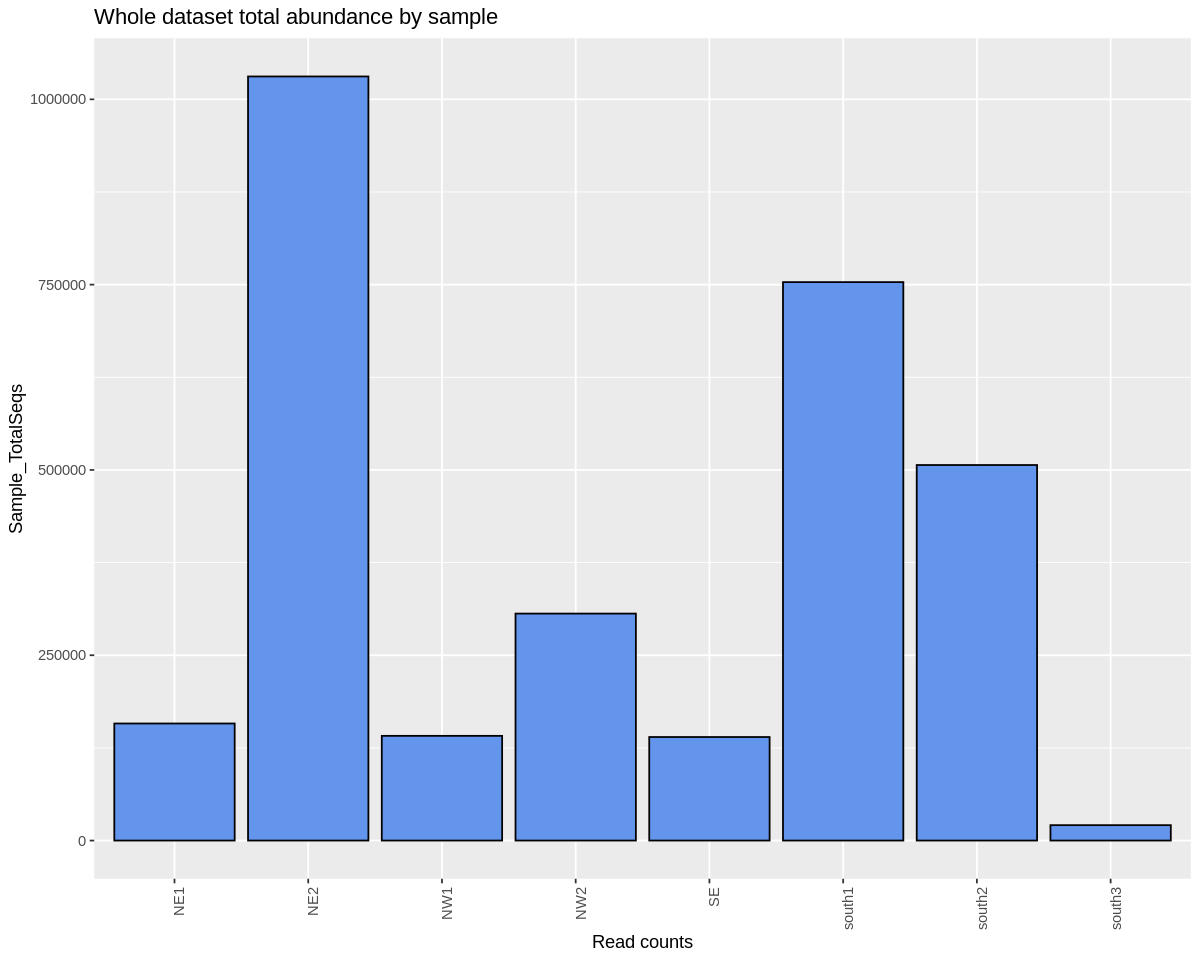

In [156]:
options(repr.plot.width=10, repr.plot.height=8)
sums_all <- data.frame(sample_sums(otu_table(gb_mg)))
colnames(sums_all) <- "Sample_TotalSeqs"
ggplot(sums_all, aes(x = row.names(sums_all), y= Sample_TotalSeqs)) + 
  geom_bar(stat="identity",colour="black",fill="cornflowerblue")  +
  xlab("Read counts") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("Whole dataset total abundance by sample")

**Now, take a look in the reads abundance from the Arthropoda subset:**

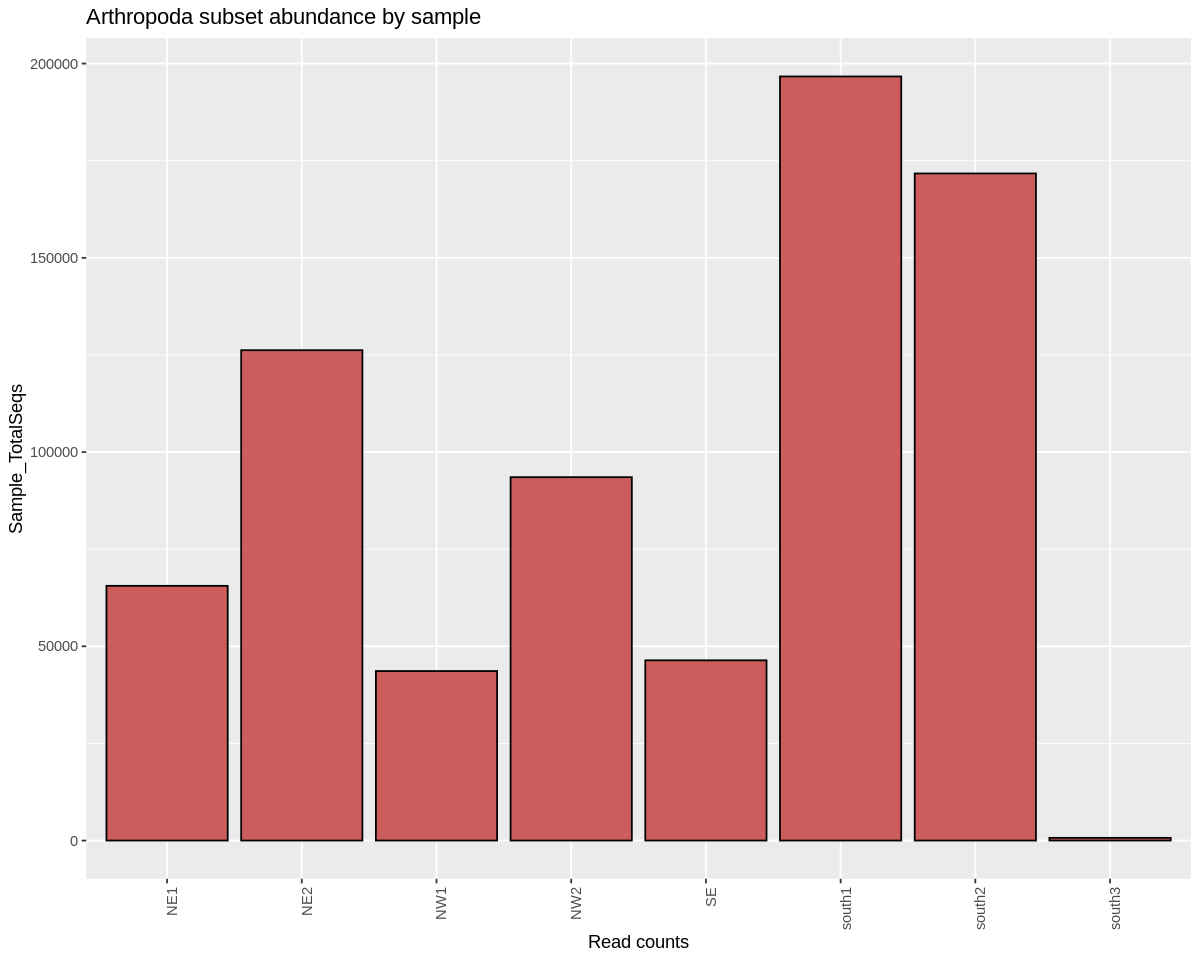

In [157]:
sums_art <- data.frame(sample_sums(otu_table(art_gb_mg)))
colnames(sums_art) <- "Sample_TotalSeqs"
ggplot(sums_art, aes(x = row.names(sums_art), y= Sample_TotalSeqs)) + 
  geom_bar(stat="identity",colour="black",fill="indianred")  +
  xlab("Read counts") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("Arthropoda subset abundance by sample")

**Observe that we have a quite similar abundance distribution comparing the whole dataset and the Arthropoda subset, but the amount of reads is much lower in `Arthropoda subset` (y axis).**

**##############################################################################**<p>
**Phyla composition**<p>
**##############################################################################**

**Let's check the Phyla composition, in order to better understand what this pair of primers amplified:**

Optionally we can remove `Unassigned` taxa, in order to better visualize the Phyla:

In [158]:
gb_mg_cl <- subset_taxa(gb_mg, kingdom != "Unassigned")
gb_mg_cl <- prune_taxa(taxa_sums(gb_mg_cl) > 0, gb_mg_cl)

In [159]:
gb_mg_phy <- gb_mg_cl %>%
  tax_glom(taxrank = "phylum") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.05) %>%                         
  arrange(phylum)

In [160]:
gb_mg_phy$cave = factor(gb_mg_phy$cave, levels = c("south1", "south2", "south3", "NE1", "NE2", "SE", "NW1", "NW2"))

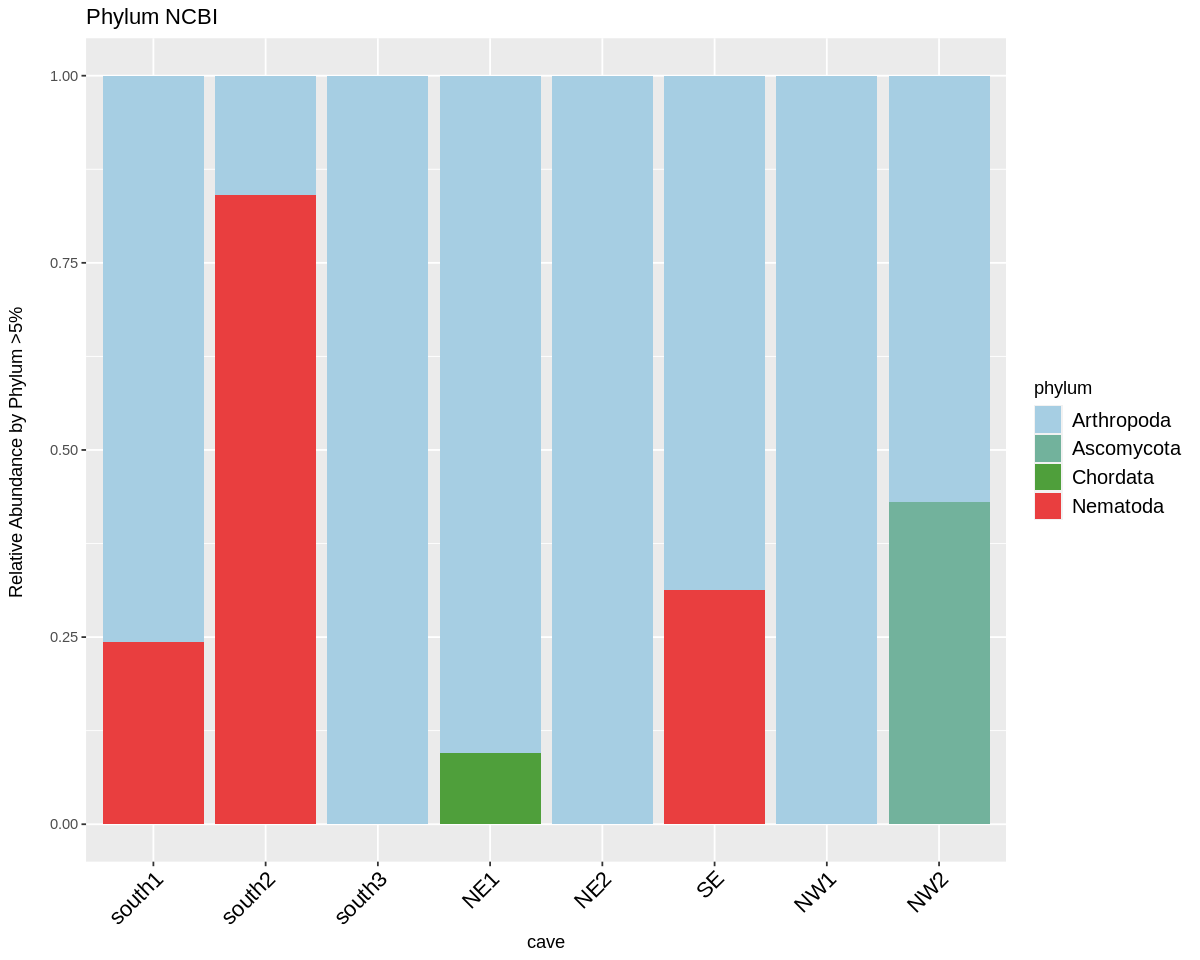

In [162]:
ggplot(gb_mg_phy, aes(x = cave, y = Abundance, fill = phylum)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_palette(8, brewer.pal(12, "Paired"))) +
  theme(axis.text.x = element_text(colour = "black", size=13, angle=45, hjust = 1, vjust = 1)) +
  theme(legend.text = element_text(size=12)) +
  ylab("Relative Abundance by Phylum >5% \n") +
  ggtitle("Phylum NCBI")

**Now, as we'd like to check `proportions of each phylum`, let's use the following funtion:**

In [163]:
# must use subseted taxa because character cannot be used as filter inside function for subset_taxa function
get_proportion <- function(complete_dataset, subseted_taxa) {
    total_n        <- sum(sample_sums(complete_dataset))
    desired_n      <- sum(sample_sums(subseted_taxa))
    return(desired_n / total_n)
}

In [164]:
# For arthropoda
get_proportion(all_gb, subset_taxa(all_gb, phylum == "Arthropoda"))

[1] 0.2435518

In [165]:
# For nematoda
get_proportion(all_gb, subset_taxa(all_gb, phylum == "Nematoda"))

[1] 0.2546594

In [166]:
# For Chordata
get_proportion(all_gb, subset_taxa(all_gb, phylum == "Chordata"))

[1] 0.004225883

In [167]:
# For Ascomycota
get_proportion(all_gb, subset_taxa(all_gb, phylum == "Ascomycota"))

[1] 0.001271004

In [168]:
# For Unassigned
get_proportion(all_gb, subset_taxa(all_gb, kingdom == "Unassigned"))

[1] 0.4955901

**Observe that `Arthropoda` corresponds to only 24% of the whole dataset reads abundance, and almost 50% of the reads were grouped into OTUs without a taxonomic assignment according to NCBI.**

**Let me show you another way to represent the overall taxonomic coverage of your dataset:**

**Pie chart** (main groups)<p>
Get the `proportions` of your most abundant taxonomic groups using the above functions and replace in the following command:

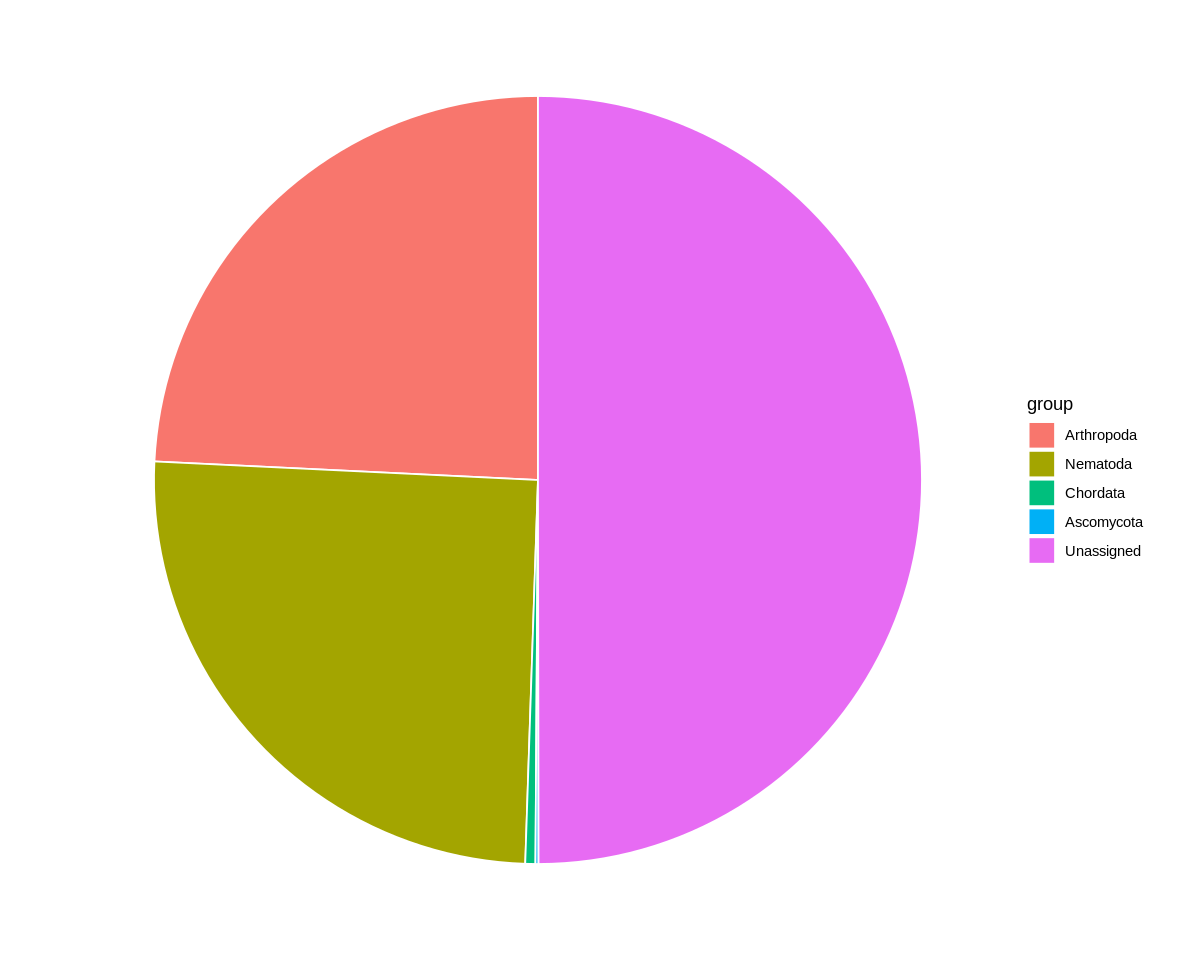

In [169]:
data <- data.frame(
  group=c("Arthropoda", "Nematoda", "Chordata", "Ascomycota",  "Unassigned"),
  value=c(0.24,0.25,0.0042,0.00127, 0.495))
data$group = factor(data$group, levels = c("Arthropoda", "Nematoda", "Chordata", "Ascomycota", "Unassigned"))
ggplot(data, aes(x="", y=value, fill=group)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() 

**The amount of `Unassigned` OTUs is directly related to the `database` used `(NCBI, BOLD, custom, combined...)` and with your eDNA sample, because some times you may be investigating a sample from an undersampled environment, with little-known organisms, for example.**

**##############################################################################**<p>
**Arthropoda Order composition**<p>
**##############################################################################**

**Let's take a look in the Arthropoda orders composition, to get a glimpse of the investigation's targets.**

In [170]:
art_gb_mg_ord <- art_gb_mg %>%
  tax_glom(taxrank = "order") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.01) %>%                         
  arrange(order)

In [171]:
art_gb_mg_ord$cave = factor(art_gb_mg_ord$cave, levels = c("south1", "south2", "south3", "NE1", "NE2", "SE", "NW1", "NW2"))

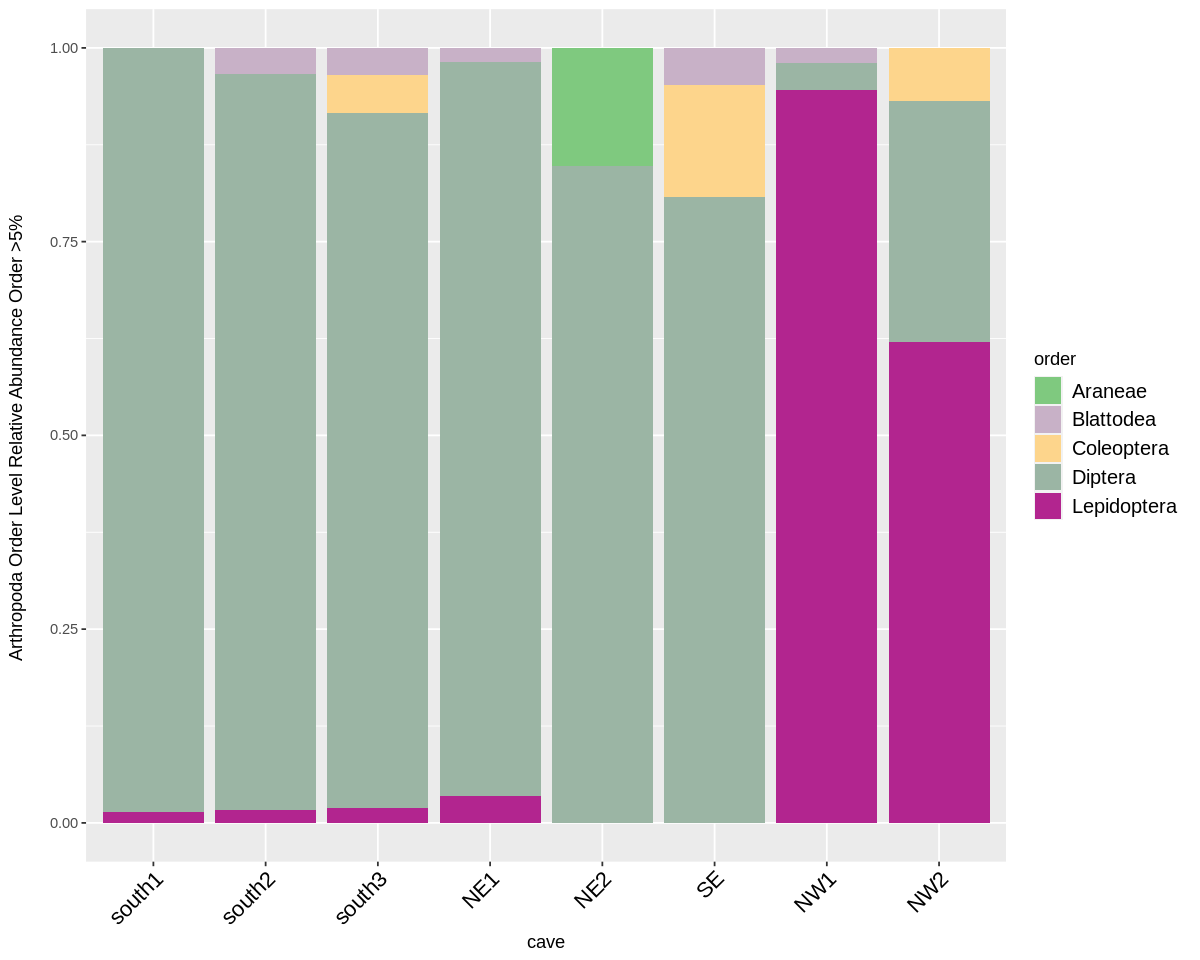

In [174]:
ggplot(art_gb_mg_ord, aes(x = cave, y = Abundance, fill = order)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_palette(7, brewer.pal(8, "Accent"))) +
  theme(axis.text.x = element_text(colour = "black", size=13, angle=45, hjust = 1, vjust = 1)) +
  theme(legend.text = element_text(size=12)) +
  ylab("Arthropoda Order Level Relative Abundance Order >5% \n") 

**We can clearly see that we have a huge `dominance` of Diptera reads.**<p>
**This kind os situation could require some `extra investigation´, as the `Top OTUs` exploration shown above, for example, in order to find out if we do not have highly abundant `skewed OTUs`, which could be `overshadowing` other `low abundance taxa`.**

**################################################################################**<p>
**I will show you just some examples of `alpha and beta-diversity analysis`, since there is lots of tutorials with different approaches, which you can choose according to your project's main goals.**<p>
**Let's start with `alpha-diversity`:**<p>
**################################################################################**

**The following function plots several alpha-diversity metrics and allow the manipulation on which variables to use and graphically show:**<p>
**Explore it typing**<p>
`help(plot_richness)`<p>
**In Rstudio to understand better all the possibilities.**

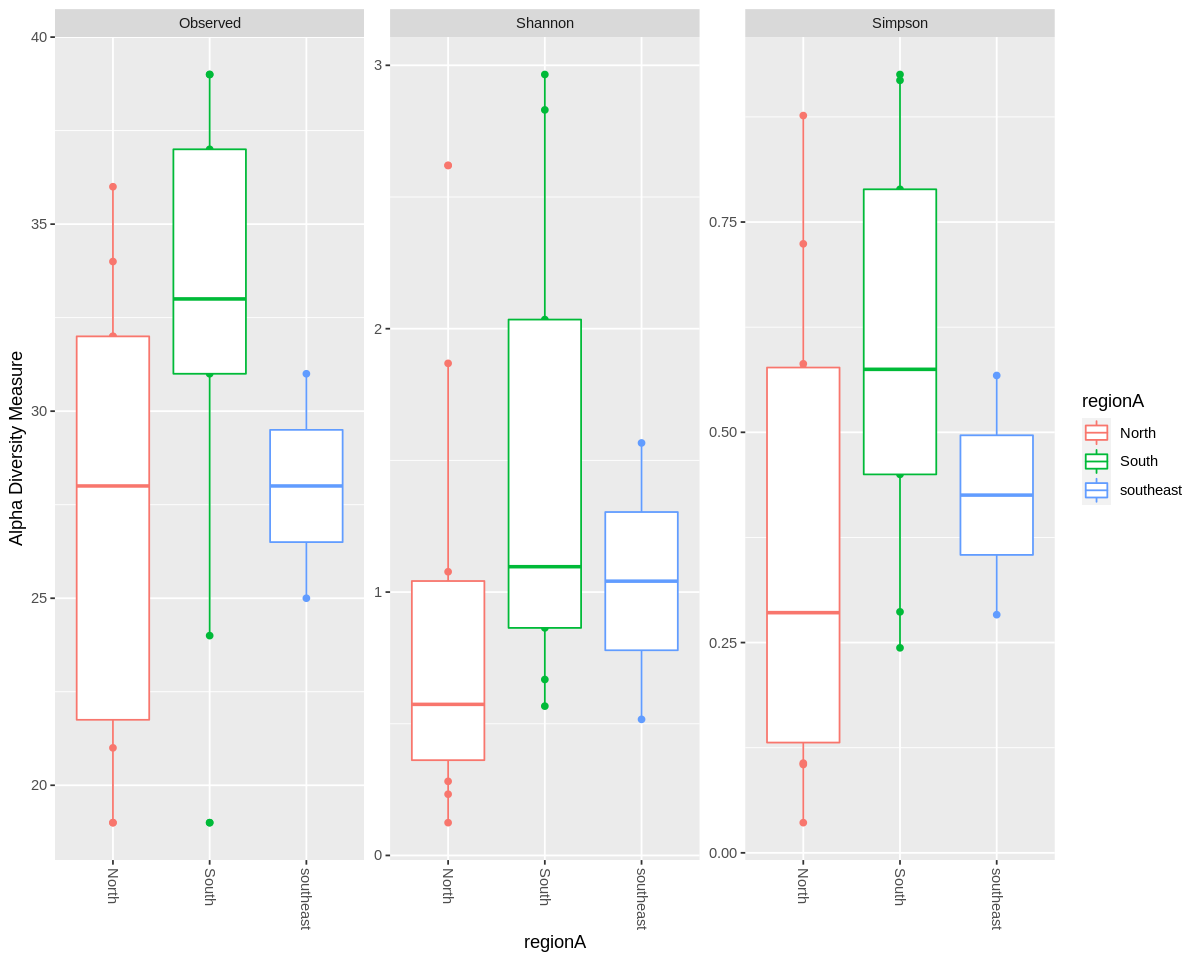

In [175]:
plot_richness(art_gb, x = "regionA", color = "regionA", measures=c("Observed","Shannon","Simpson")) + geom_boxplot()

Let's check if the differences observed in the alpha-diversity metrics are significantly related to the variable used in this example `(region South, North, and Southeast)`:

**1. get all metrics available in `estimate_richness` function.<p>**
Remeber to type `help(estimate_richness)` in Rstudio.

In [177]:
art_gb_alfa <- estimate_richness(art_gb)
art_gb_alfa[1:3,]

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MB211III,24,34.5,10.515689,35.51324,3.267869,0.6680571,0.2865392,1.401619,2.407408
MB211II,39,43.5,4.104376,47.42633,3.428545,0.5669148,0.2437354,1.322289,3.755547
MB211I,32,35.0,3.414507,36.23182,2.952447,0.8639955,0.4499512,1.818020,3.643622


Now let's check the metrics `normality` using `shapiro.test`:

In [178]:
art_gb_alfa_test <- t(sapply(art_gb_alfa, function(x) unlist(shapiro.test(x))))
art_gb_alfa_test

,statistic.W,p.value,method,data.name
Observed,0.932514523279501,0.12393786154019,Shapiro-Wilk normality test,x
Chao1,0.985753482846045,0.977642231264233,Shapiro-Wilk normality test,x
se.chao1,0.917026104692036,0.0575514903685027,Shapiro-Wilk normality test,x
ACE,0.97568079138,0.821192486632244,Shapiro-Wilk normality test,x
se.ACE,0.907646106519043,0.0364502936456823,Shapiro-Wilk normality test,x
Shannon,0.87202118982474,0.00700820714147211,Shapiro-Wilk normality test,x
Simpson,0.937835649368008,0.161450284005307,Shapiro-Wilk normality test,x
InvSimpson,0.614980340582744,1.32291898978454e-06,Shapiro-Wilk normality test,x
Fisher,0.76461316002693,0.000109527194545853,Shapiro-Wilk normality test,x


**We see that `Shannon` should not be used, since it showed a highly significative `shapiro.test` p-value.**

In [180]:
alfa <- subset(art_gb_alfa, select=c(1,2,7,8))
alfa[1:5,]

,Observed,Chao1,Simpson,InvSimpson
,<dbl>,<dbl>,<dbl>,<dbl>
MB211III,24,34.50,0.2865392,1.401619
MB211II,39,43.50,0.2437354,1.322289
MB211I,32,35.00,0.4499512,1.818020
MB214III,33,52.50,0.5663678,2.306102
MB214II,37,63.25,0.5748872,2.352317


**Now let's get a fisrt evaluation of each of our selected alpha-diversity metrics using anova:**

In [181]:
test_Observed <- aov(alfa$Observed ~ sample_data(art_gb)$regionA, alfa)
anova(test_Observed) 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(art_gb)$regionA,2,121.1510,60.57548,1.553605,0.2359527
Residuals,20,779.8056,38.99028,NA,NA


In [182]:
test_Chao1 <- aov(alfa$Chao1 ~ sample_data(art_gb)$regionA, alfa)
anova(test_Chao1) 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(art_gb)$regionA,2,529.3251,264.6625,2.490199,0.1082197
Residuals,20,2125.6334,106.2817,NA,NA


In [183]:
test_Simpson <- aov(alfa$Simpson ~ sample_data(art_gb)$regionA, alfa)
anova(test_Simpson) 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(art_gb)$regionA,2,0.2463904,0.12319522,1.78111,0.1941502
Residuals,20,1.3833534,0.06916767,NA,NA


In [184]:
test_InvSimpson <- aov(alfa$InvSimpson ~ sample_data(art_gb)$regionA, alfa)
anova(test_InvSimpson) 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(art_gb)$regionA,2,33.31834,16.65917,1.485224,0.2503834
Residuals,20,224.33216,11.21661,NA,NA


**For this data, `permutational` and other `non-parametric` methods will be required.**

**#############################################################################**<p>
**Let's take a look at `evenness` metric, which can show us an ectual `environmental heterogeneity` or may be pointing to a `skewed composition and abundance distribution`:**<p>
**#############################################################################**

In [185]:
shapiro.test(sample_sums(t(art_gb_mg)))


	Shapiro-Wilk normality test

data:  sample_sums(t(art_gb_mg))
W = 0.95529, p-value = 0.7643


We run a `shapiro.test` on the data to ensure that we will have a fair evenness representation.

Now we run the following commands from `Vegan`  package. Take a look on it later!

In [186]:
H <- diversity(t(otu_table(t(art_gb_mg))))
S <- specnumber(t(otu_table(t(art_gb_mg))))
J <- H/log(S)
J

NE1       NE2       NW1       NW2        SE    south1    south2    south3 
0.2041771 0.1234011 0.2788598 0.1886589 0.1602951 0.2189671 0.3060405 0.7674188

In [187]:
mean(J)

[1] 0.2809773

**This low evenness indicates a highly heterogeneous composition that should be further investigates (i.e. using the Top OTUs abundance distribution).**

With the following barplot I am showing to you how to create a dataset by hand and plot it. It is usefull when you see something interesting, but there is not a function or a good example about it in the Internet's tutorials.

In [188]:
data_ev <- read.table(text = "cave  even  region
NE1  0.204  northeast
NE2  0.123  northeast
NW1  0.279  northwest
NW2  0.189  northwest
SE  0.160  southeast
south1  0.219  south
south2  0.306  south
south3  0.767  south", header = TRUE)

In [189]:
data_ev

cave,even,region
<chr>,<dbl>,<chr>
NE1,0.204,northeast
NE2,0.123,northeast
NW1,0.279,northwest
NW2,0.189,northwest
SE,0.160,southeast
south1,0.219,south
south2,0.306,south
south3,0.767,south


**Let's plot this very simple (and useful) barplot:**

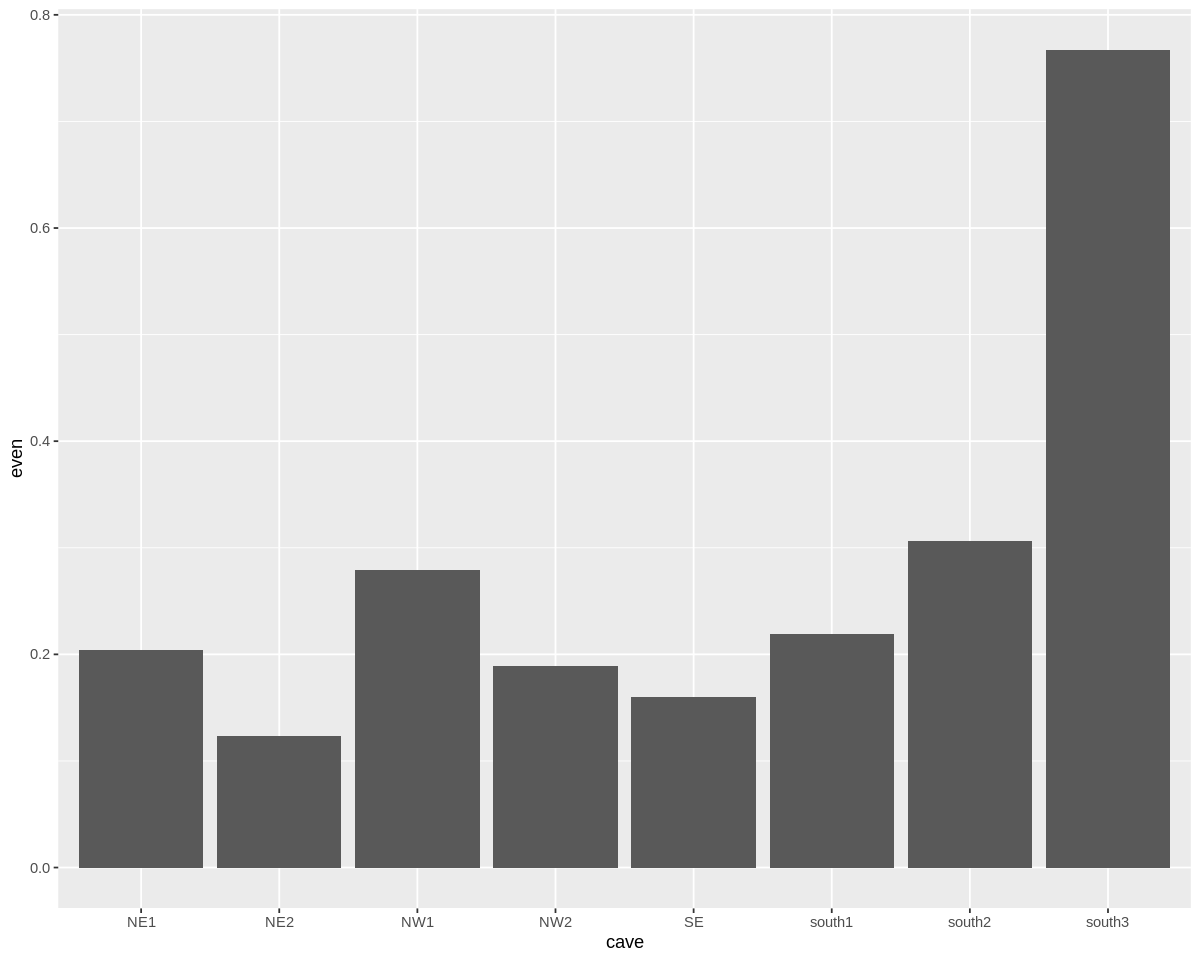

In [190]:
# Barplot
ggplot(data_ev, aes(x=cave, y=even)) + 
  geom_bar(stat = "identity")

**We see that only the sample `South3` has a pretty good evenness.

**The following commands are planned to further explore deeper taxa ranks, as families.**

**First, let's check the proportions of the Arthropoda orders observed in the composition barplot already run.**

In [191]:
get_proportion(art_gb, subset_taxa(art_gb, order == "Araneae"))

[1] 0.009538586

In [192]:
get_proportion(art_gb, subset_taxa(art_gb, order == "Blattodea"))

[1] 0.02723756

In [193]:
get_proportion(art_gb, subset_taxa(art_gb, order == "Coleoptera"))

[1] 0.04146551

In [194]:
get_proportion(art_gb, subset_taxa(art_gb, order == "Diptera"))

[1] 0.6915642

In [195]:
get_proportion(art_gb, subset_taxa(art_gb, order == "Lepidoptera"))

[1] 0.229959

**We see that we have over 69% of the reads abundance belonging to Diptera, and over 22% to Lepidoptera. Let's explore the Diptera and Lepidoptera families:**

**#########################################################################**<p>
**subset Diptera, get most abundant families**<p>
**#########################################################################**

In [196]:
gb_dip <- subset_taxa(art_gb, order == "Diptera")
gb_dip <- prune_taxa(taxa_sums(gb_dip) > 0, gb_dip)

In [197]:
gb_dip_fam <- gb_dip %>%
  tax_glom(taxrank = "family") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.1) %>%                         
  arrange(Abundance)

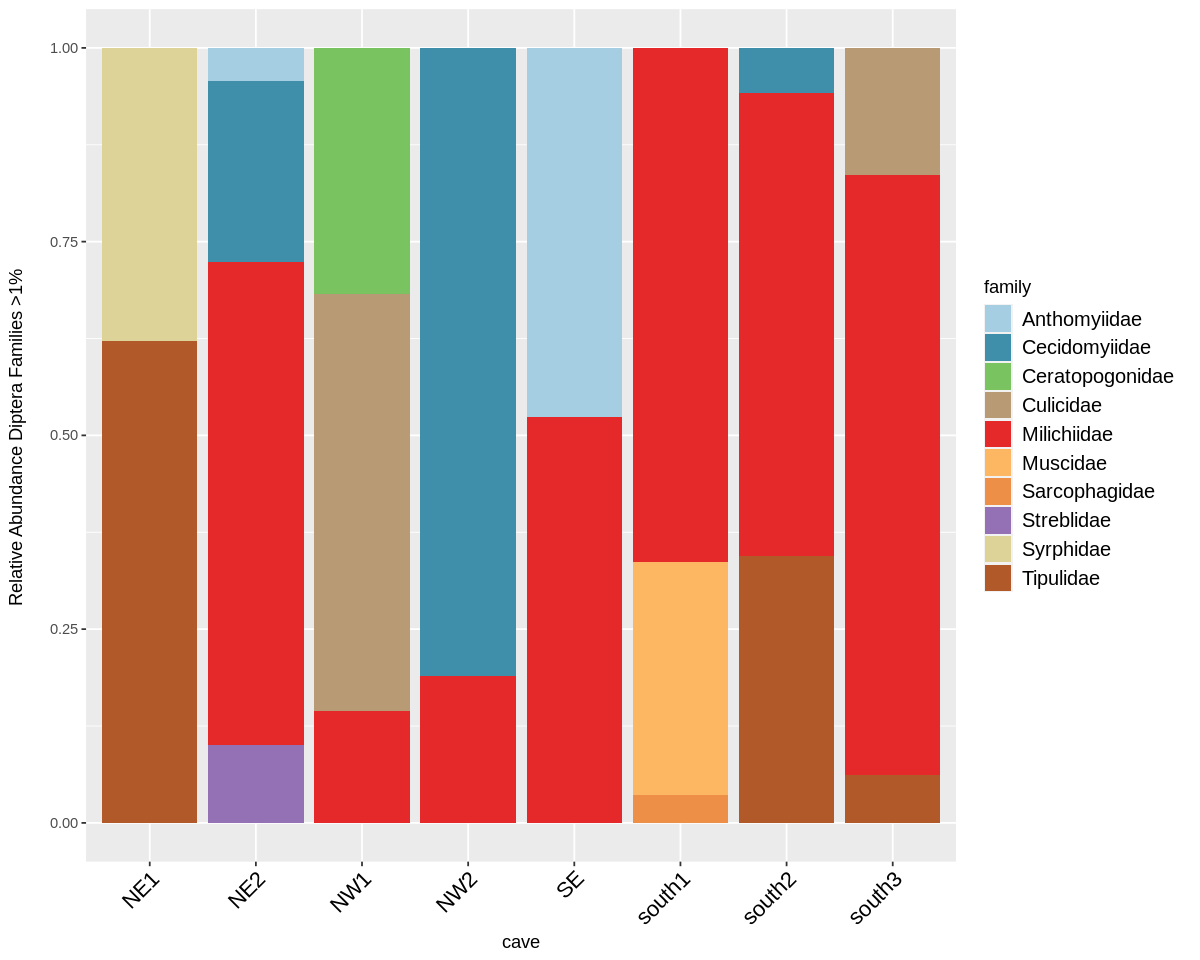

In [199]:
ggplot(gb_dip_fam, aes(x = cave, y = Abundance, fill = family)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_palette(10, brewer.pal(12, "Paired"))) +
  theme(axis.text.x = element_text(colour = "black", size=13, angle=45, hjust = 1, vjust = 1)) +
  theme(legend.text = element_text(size=12)) +
  ylab("Relative Abundance Diptera Families >1% \n") 

**Let's get the proportions of Diptera Top Families:**

In [200]:
sum(sample_sums(art_gb))

[1] 744450

In [201]:
get_proportion(art_gb, subset_taxa(art_gb, order == "Diptera"))

[1] 0.6915642

In [202]:
get_proportion(subset_taxa(art_gb, order == "Diptera"), subset_taxa(art_gb, family == "Milichiidae"))

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


[1] 0.623963

In [203]:
get_proportion(subset_taxa(art_gb, order == "Diptera"), subset_taxa(art_gb, family == "Cecidomyiidae"))

[1] 0.1501666

In [204]:
get_proportion(subset_taxa(art_gb, order == "Diptera"), subset_taxa(art_gb, family == "Tipulidae"))

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


[1] 0.1079239

**We have `Milichiidae` family with over 62% of total Arthropoda reads, followed by `Cecidomyiidae` with 15% and `Tipulidae` with 11%.**

**Let's get the proportion for all other families, in order to plot it later:**

In [222]:
sum(sample_sums(subset_taxa(art_gb, family == "Milichiidae"))) +
sum(sample_sums(subset_taxa(art_gb, family == "Cecidomyiidae"))) +
sum(sample_sums(subset_taxa(art_gb, family == "Tipulidae")))

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”
Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


[1] 454112

In [223]:
others <- 
sum(sample_sums(subset_taxa(art_gb, order == "Diptera"))) -
(
    sum(sample_sums(subset_taxa(art_gb, family == "Milichiidae"))) +
    sum(sample_sums(subset_taxa(art_gb, family == "Cecidomyiidae"))) +
    sum(sample_sums(subset_taxa(art_gb, family == "Tipulidae")))
)
others

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”
Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


[1] 60723

In [224]:
others / sum(sample_sums(subset_taxa(art_gb, order == "Diptera")))

[1] 0.1179465

**The `others` Diptera families represent 12% of the Diptera abundance.**

**Let's do the same for `Lepidoptera`:**

In [212]:
gb_lepi <- subset_taxa(art_gb, order == "Lepidoptera")
gb_lepi <- prune_taxa(taxa_sums(gb_lepi) > 0, gb_lepi)

In [213]:
gb_lepi_fam <- gb_lepi %>%
  tax_glom(taxrank = "family") %>%                     
  transform_sample_counts(function(x) {x/sum(x)} ) %>% 
  psmelt() %>%                                         
  filter(Abundance > 0.1) %>%                         
  arrange(Abundance)

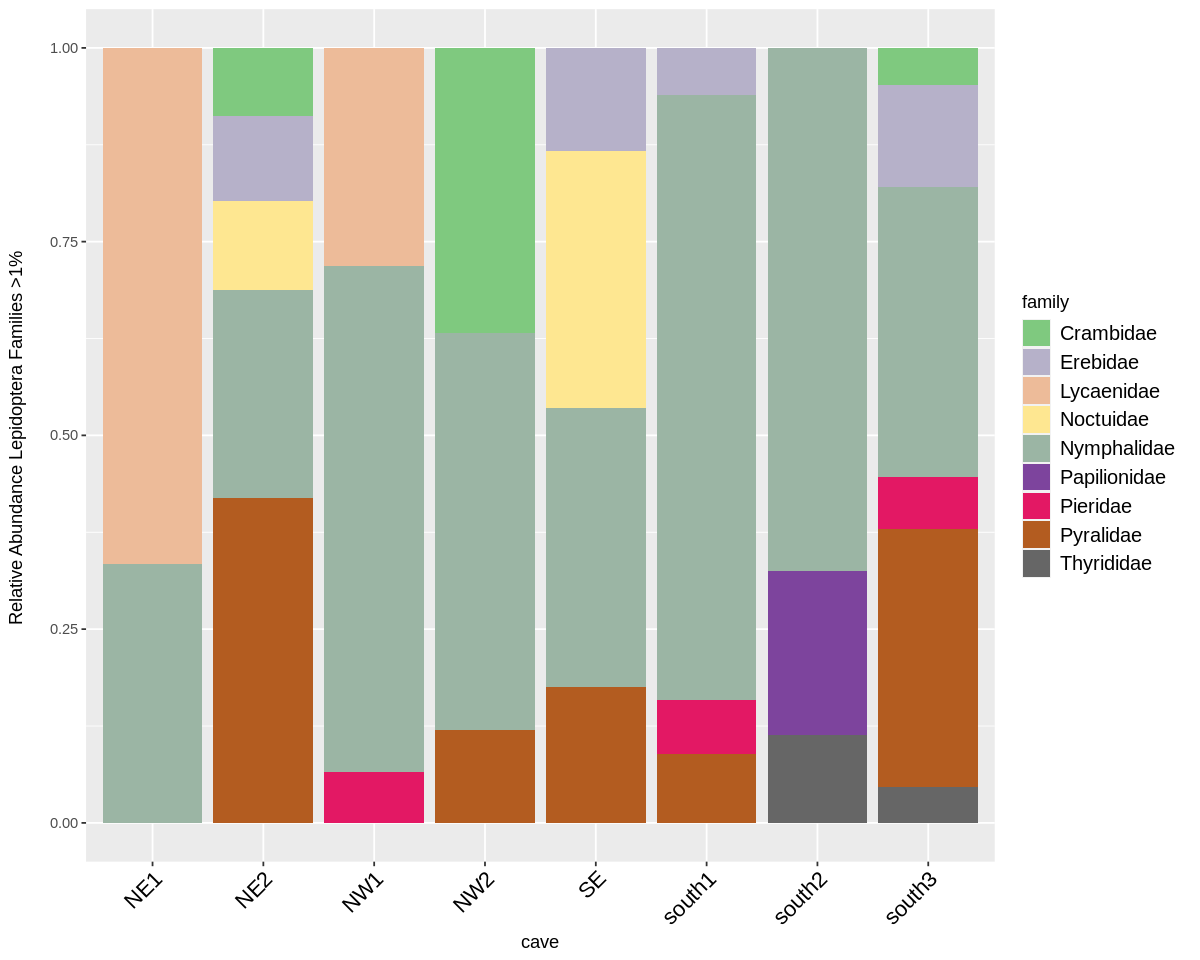

In [214]:
ggplot(gb_lepi_fam, aes(x = cave, y = Abundance, fill = family)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_palette(9, brewer.pal(8, "Accent"))) +
  theme(axis.text.x = element_text(colour = "black", size=13, angle=45, hjust = 1, vjust = 1)) +
  theme(legend.text = element_text(size=12)) +
  ylab("Relative Abundance Lepidoptera Families >1% \n") 

In [215]:
get_proportion(art_gb, subset_taxa(art_gb, order == "Lepidoptera"))

[1] 0.229959

In [216]:
get_proportion(subset_taxa(art_gb, order == "Lepidoptera"), subset_taxa(art_gb, family == "Nymphalidae"))

[1] 0.6380927

In [217]:
get_proportion(subset_taxa(art_gb, order == "Lepidoptera"), subset_taxa(art_gb, family == "Papilionidae"))

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


[1] 0.1989509

In [218]:
get_proportion(subset_taxa(art_gb, order == "Lepidoptera"), subset_taxa(art_gb, family == "Pyralidae"))

[1] 0.01331246

In [225]:
sum(sample_sums(subset_taxa(art_gb, family == "Nymphalidae"))) +
sum(sample_sums(subset_taxa(art_gb, family == "Papilionidae"))) +
sum(sample_sums(subset_taxa(art_gb, family == "Pyralidae")))

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


[1] 145575

In [226]:
others <- 
sum(sample_sums(subset_taxa(art_gb, order == "Lepidoptera"))) -
(
    sum(sample_sums(subset_taxa(art_gb, family == "Nymphalidae"))) +
    sum(sample_sums(subset_taxa(art_gb, family == "Papilionidae"))) +
    sum(sample_sums(subset_taxa(art_gb, family == "Pyralidae")))
)
others

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”


[1] 25618

In [227]:
others / sum(sample_sums(subset_taxa(art_gb, order == "Lepidoptera")))

[1] 0.149644

**The `other` Lepidoptera families represent 15% of the Lepidoptera abundance.**

**Now we are going to plot a `treemap`, which is a very intuitive and nice plot to illustrate the composition hierarchy.**

Load the `treemap` package

In [230]:
library(treemapify) 

**Create your own table with the proportions we got in the last `get_proportion` commands:**

In [228]:
data_tree <- read.table(text = "order	count1	family	count2
Diptera	0.69	Milichiidae	0.62
Diptera	0.69	Cecidomyiidae	0.15
Diptera	0.69	Tipulidae	0.11
Diptera	0.69	Others	0.12
Lepidoptera	0.23	Nymphalidae	0.64
Lepidoptera	0.23	Papilionidae	0.20
Lepidoptera	0.23	Pyralidae	0.013
Lepidoptera	0.23	Others	0.15
Other_Arthr	0.08	Others	1", header = TRUE)
data_tree

order,count1,family,count2
<chr>,<dbl>,<chr>,<dbl>
Diptera,0.69,Milichiidae,0.620
Diptera,0.69,Cecidomyiidae,0.150
Diptera,0.69,Tipulidae,0.110
Diptera,0.69,Others,0.120
Lepidoptera,0.23,Nymphalidae,0.640
Lepidoptera,0.23,Papilionidae,0.200
Lepidoptera,0.23,Pyralidae,0.013
Lepidoptera,0.23,Others,0.150
Other_Arthr,0.08,Others,1.000


**Now let's plot an example `treemap`:**

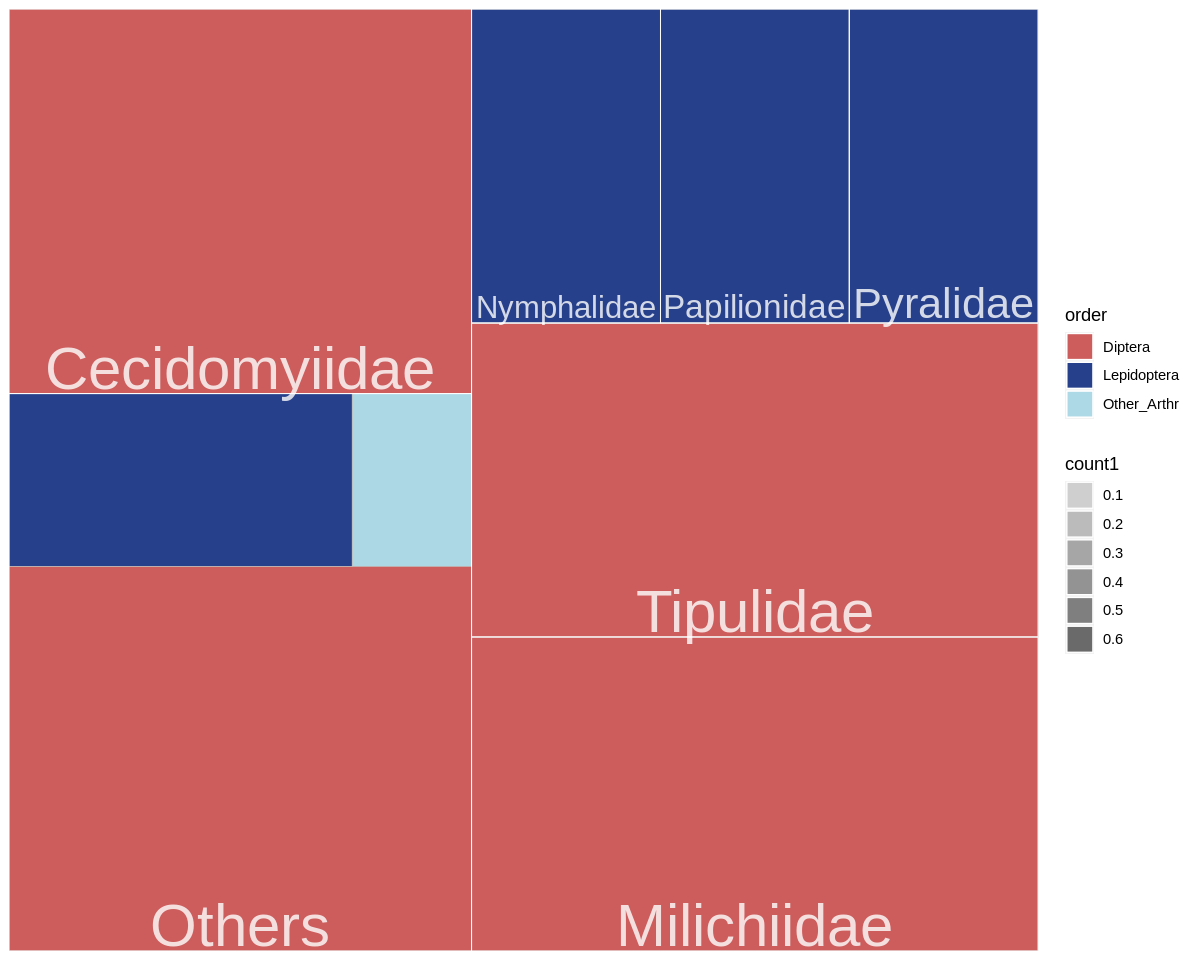

In [231]:
ggplot(data_tree, aes(area=count1, fill=order, subgroup=family))+ 
  geom_treemap()+
  geom_treemap(aes(alpha = count1))+
  geom_treemap_subgroup_border(color="white", size=0.7)+
  geom_treemap_subgroup_text(color="white", alpha = 0.8)+
  scale_fill_manual(values = c("indianred", "royalblue4", "lightblue")) +
  scale_alpha_continuous(range = c(0.2, 1))

**Now I'll show you an example of a pretty intersting heatmap.**<p>
Check the **`help(plot_heatmap)`** in Rstudio in order to understand everything this function is able to do.

Warning message:
“Transformation introduced infinite values in discrete y-axis”


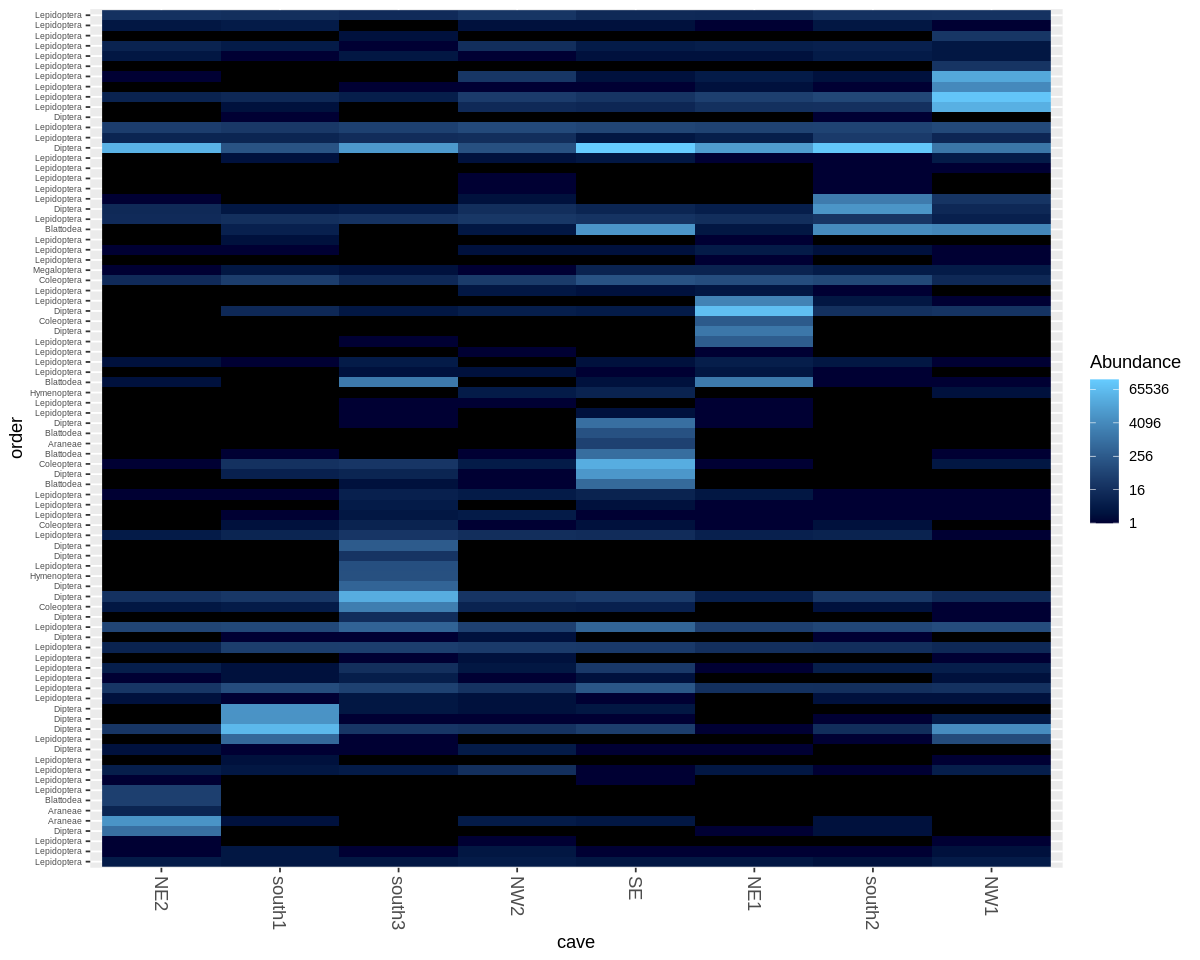

In [232]:
top_heat <- prune_taxa(names(sort(taxa_sums(art_gb_mg),TRUE)[1:100]), art_gb_mg)
plot_heatmap(top_heat, "PCoA", "jaccard", "cave", "order", max.label = 100, binary = TRUE)

**#########################################################################**<p>
**Let's take a look in some basic Beta diversity analysis:**<p>
**#########################################################################**

First we need to `transpose` our Arthropoda OTU table, because the following commands are from `Vegan`  package, not Phyloseq's.

In [233]:
art_data <- data.frame(t(otu_table(art_gb)))

Transform to a `binary table` (presence/absence):

In [236]:
sppPA <- (art_data>1)*1 

Now we run `vagdist` function, which get the data distances based on the selected methos, in this case `Jaccard`.

In [237]:
beta <- vegdist(sppPA,method="jaccard", binary=TRUE)

We run a multidimensional scaling (MDS) of a data matrix using the function `cmdscale`:

In [239]:
beta_pcoa <- cmdscale(beta)

and transform the axis scores to a dataframe:

In [241]:
beta_pcoa_data <- data.frame(beta_pcoa)
beta_pcoa_data[1:5,]

,X1,X2
,<dbl>,<dbl>
MB211III,-0.17104993,-0.254666727
MB211II,-0.16506301,0.008951212
MB211I,0.11941022,-0.143900750
MB214III,0.01919033,0.174945173
MB214II,-0.26100985,0.113351398


We have to define our variable into the new dataframe, in this case I am defining the `cave name` and `region` for each sample in the `beta_pcoa_data` dataframe.

In [242]:
beta_pcoa_data$cave <- c("south1", "south1", "south1", "south2", "south2", "south2", "south3", "south3", "south3",
                         "NE1", "NE1", "NE1", "NE2", "NE2", "NE2", "SE", "SE", "NW1", "NW1", "NW1", "NW2", "NW2", "NW2")

In [243]:
beta_pcoa_data$region <- c("South", "South", "South", 
                           "South", "South", "South",
                           "South", "South", "South",
                           "Northeast", "Northeast", 
                           "Northeast", "Northeast",
                           "Northeast", "Northeast",
                           "Southeast", 
                           "Southeast",
                           "Northwest", "Northwest",
                           "Northwest", "Northwest",
                           "Northwest", "Northwest")

**We use the ggrepel package in order to plot our PCoA showing our variables just defined.**

In [244]:
library("ggrepel")

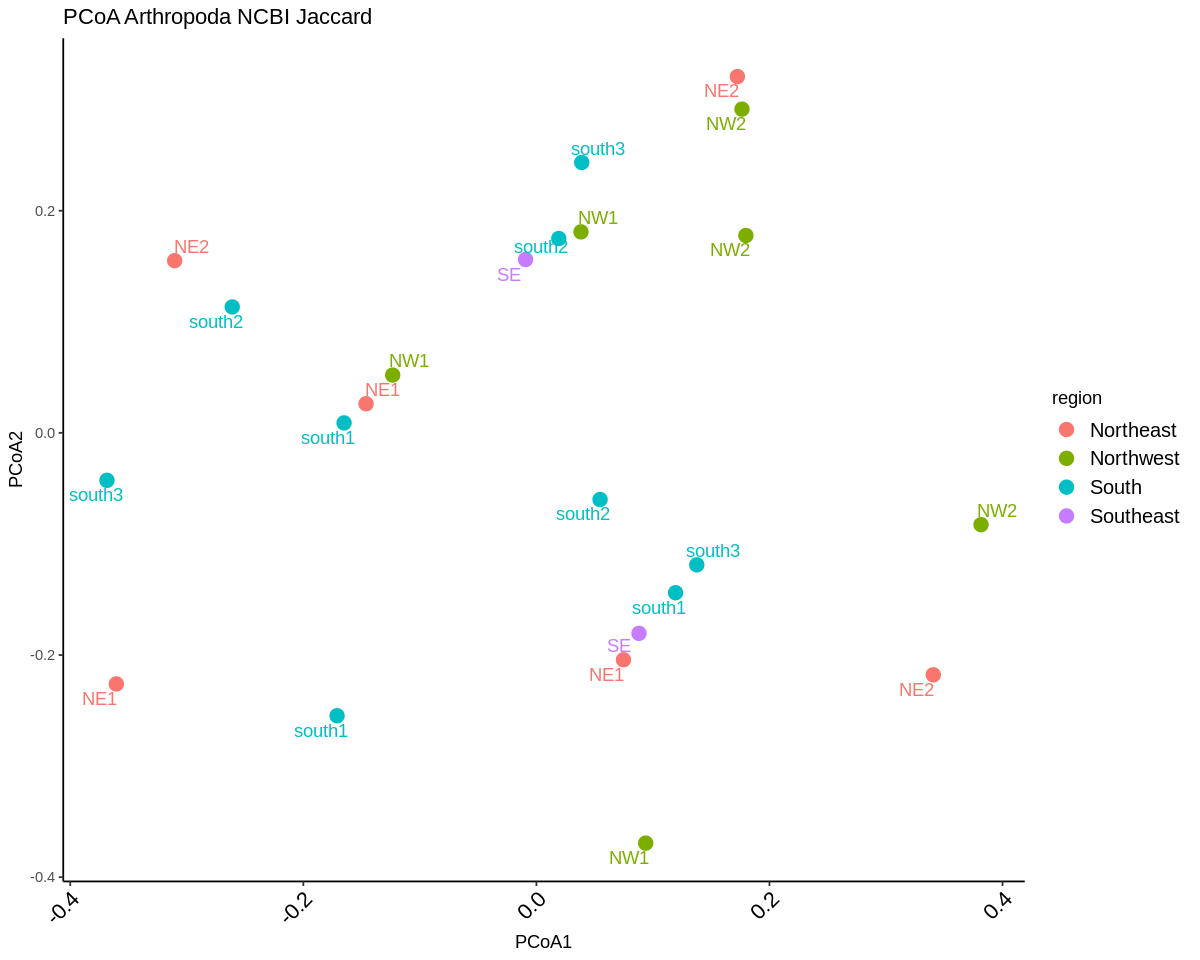

In [246]:
ggplot(beta_pcoa_data, aes(x=X1, y=X2, color=region, fill=region))+
  geom_point(shape = 21,size=3, stroke=1)+
  geom_text_repel(aes(label = cave), show.legend=F)+
  theme_classic()+ xlab("PCoA1") + ylab("PCoA2") +
  theme(axis.text.x = element_text(colour = "black", size=13, angle=45, hjust = 1, vjust = 1)) +
  theme(legend.text = element_text(size=12)) +
  ggtitle("PCoA Arthropoda NCBI Jaccard")

**#########################################################################**<p>
**Finally, I'll show you how to run `Betadisper` function, from `Vegan` package.**<p>
`Betadisper` implements a permutational procedure for the analysis of multivariate homogeneity of group dispersions (variances).<p>
**It shows how much your variables are related with the `beta-diversity` observed.**<p>
Take a look in `help(betadisper)` on Rstudio.<p>
**#########################################################################**

Let's get the distances again:

In [247]:
dist=vegdist(t(otu_table(art_gb)), distance="jaccard", binary=TRUE)

Run betadisper on those distances, calculating the centroid according to the `cave` variable:

In [248]:
beta <- betadisper(dist, sample_data(art_gb)$cave, type = "centroid", bias.adjust = TRUE, sqrt.dist = FALSE, add = FALSE)

Let's chack if the centroid's differences are significative:

In [249]:
anova(beta)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,7,0.09583907,0.013691296,5.071573,0.004058852
Residuals,15,0.04049423,0.002699615,NA,NA


yes, they are, now let's check it using permutest, a non-parametric method:

In [252]:
permutest(beta, pairwise = TRUE, permutations = 999)


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)   
Groups     7 0.095839 0.0136913 5.0716    999  0.003 **
Residuals 15 0.040494 0.0026996                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
              NE1        NE2        NW1        NW2         SE     south1
NE1               0.00600000 0.15400000 0.23100000 0.99500000 0.87500000
NE2    0.00423019            0.06000000 0.03600000 0.00100000 0.03400000
NW1    0.13982807 0.05444036            0.75900000 0.17800000 0.21300000
NW2    0.21385305 0.03589966 0.76143685            0.24300000 0.28900000
SE     0.99239757 0.00050311 0.15974977 0.23412137            0.87500000
south1 0.88580633 0.02208835 0.20853530 0.28460414 0.89561548           
south2 0.23807407 0.00186879 0.0377

We observe that `NE2` significantly differs from most samples, also observed by the following **`boxplot`**:

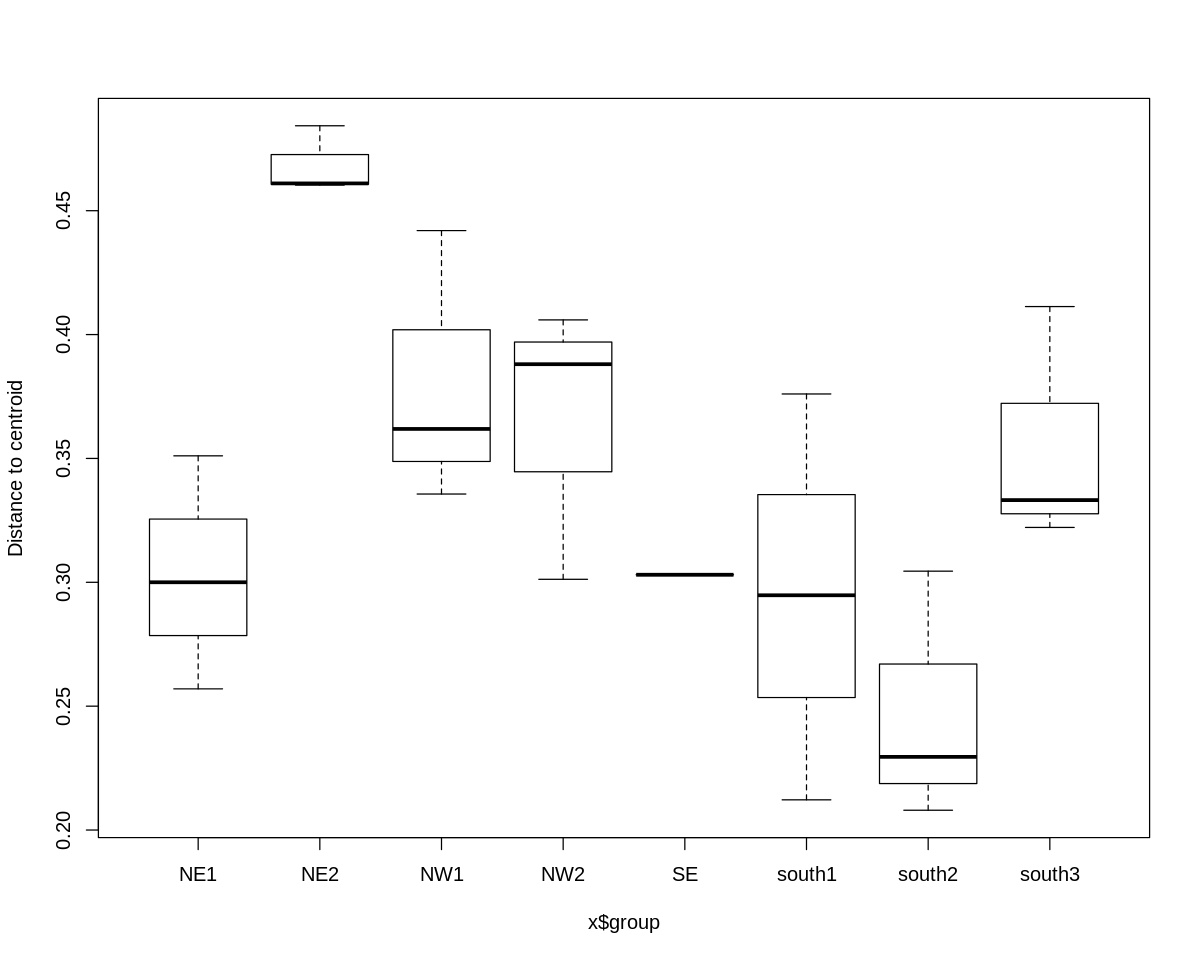

In [253]:
boxplot(beta, ylab = "Distance to centroid", col = NULL)

**#################################################################################**<P>
**THAT'S IT GUYS, I HOPE YOU ENJOYED THE METAPIPE WORKSHOP 2021!!!**<P>
**SEE YOU AROUND!!**<P>
**#################################################################################**